<a href="https://colab.research.google.com/github/Gunavardhini24/Gunavardhini24/blob/main/Real_Estate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title of The Project - **Machine Learning-Based Real Estate Profitability & Appreciation Prediction System**

By RAVADA GUNA VARDHINI

Project Type -  Machine Learning & EDA

# PROJECT SUMMARY

The real estate sector has always been one of the most dynamic and high-stakes investment domains, where buyers depend on multiple factors such as location, property type, infrastructure, and market conditions to make informed decisions. However, due to the complexity of data and the non-linear relationship between features influencing property value, manual analysis often becomes unreliable and time-consuming. To address this challenge, this project proposes an intelligent, machine-learning–driven Real Estate Investment Advisor that evaluates the profitability of a property and predicts its future market value over a 5-year period.

The primary objective of this project is twofold: (1) Classify whether a given property qualifies as a “Good Investment,” and (2) Forecast the estimated property price after five years based on various influential parameters. The system uses a publicly available dataset containing key real estate features such as property size, price, locality, BHK, amenities, age of the property, and accessibility to essential services like schools, hospitals, and public transport. Additional derived features like price per square foot, age of property, amenity scores, locality medians, and appreciation projections further enhance the dataset, ensuring more reliable predictions.

The project begins with comprehensive data preprocessing, including handling missing values, fixing inconsistencies, encoding categorical variables, removing duplicates, and normalizing numerical features. Feature engineering plays a crucial role, where new domain-based variables such as Price_per_SqFt, Age_of_Property, Amenities_Count, Locality_Median_Price, and School Density Score are created. To define the classification target, a custom “Good Investment” label is generated based on factors like appreciation potential, property affordability, BHK configuration, parking availability, locality demand, and expected growth.

Extensive Exploratory Data Analysis (EDA) is conducted to identify price trends, city-level variations, correlation patterns, distribution of features, outliers, and the relationship between location, amenities, and investment value. Insights derived from EDA guide the feature selection and model-building process, ensuring better interpretability and performance.

For the classification task, algorithms such as Logistic Regression, Random Forest Classifier, and XGBoost Classifier are evaluated, while the regression task utilizes Linear Regression, Random Forest Regressor, and XGBoost Regressor to predict future prices. Model performance is assessed using appropriate metrics—Accuracy, Precision, Recall, ROC-AUC for classification and RMSE, MAE, and R² for regression. Hyperparameter tuning and cross-validation further optimize the models. The best-performing models are tracked, compared, and logged using MLflow, providing a structured experiment management system.

The final solution is deployed through a Streamlit web application, offering an interactive and user-friendly interface. Users can input property details such as city, BHK, price, area, amenities, and infrastructure scores to receive real-time predictions. The app displays:

Classification Result: Whether the property is a “Good Investment”

Regression Output: Estimated 5-year future price

Feature Importance & Confidence Scores

Visual Insights like city-wise heatmaps, trend graphs, and price distributions

Overall, this project demonstrates how machine learning can transform real estate investment decisions by providing data-backed insights, reducing risk, empowering buyers, and enabling property platforms to evaluate listings more intelligently. It serves as a complete end-to-end data science pipeline integrating preprocessing, modeling, explainability, experiment tracking, deployment, and real-world applicability.

# GitHub Link -

# Problem Statement

Real estate investment is one of the biggest financial decisions people make, yet most buyers struggle to evaluate whether a particular property will be profitable in the long run. Property prices depend on many factors such as location, size, BHK, surrounding infrastructure, amenities, age of the property, and local demand. Because these factors are complex and interconnected, it becomes difficult for investors to correctly judge future value or investment potential using manual analysis or intuition.

Currently, there is no easy and reliable tool that can analyze property data and provide clear investment recommendations. Buyers often rely on brokers, incomplete information, or personal assumptions, which sometimes leads to poor investment choices and financial loss.

To solve this problem, this project aims to build a Real Estate Investment Advisor using machine learning. The system will analyze a property’s information and predict two key outcomes:

Whether the property is a good investment or not (Classification).

What the estimated price of the property will be after 5 years (Regression).

By providing data-driven predictions, this solution helps investors make smarter, more confident, and well-informed real estate decisions.

# Let's Begin !

# ***1. Know Your Data***

Import Libraries

In [ ]:
#  BASIC PYTHON & DATA HANDLING
import numpy as np          # Numerical operations, arrays
import pandas as pd         # Data loading, cleaning, preprocessing

#  VISUALIZATION LIBRARIES (EDA)
import matplotlib.pyplot as plt        # Basic plots (histograms, scatter, boxplots)
import seaborn as sns                  # Advanced, prettier EDA visualizations
import plotly.express as px            # Interactive charts for Streamlit
import plotly.graph_objects as go      # Custom interactive charts


#  MACHINE LEARNING (MODELS & PIPELINES)
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# train_test_split → split dataset into train & test
# GridSearchCV / RandomizedSearchCV → hyperparameter tuning

from sklearn.preprocessing import StandardScaler, OneHotEncoder
# StandardScaler → normalize numeric data
# OneHotEncoder → convert categorical variables to numeric

from sklearn.compose import ColumnTransformer
# Combines numeric + categorical preprocessing into one pipeline

from sklearn.pipeline import Pipeline
# Builds full ML pipelines (preprocessing + model)

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#  MODEL EVALUATION METRICS
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
# These metrics will evaluate the classification & regression models


*Dataset Loading*

In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()


Saving india_housing_prices.csv to india_housing_prices.csv


In [ ]:
# Upload and Load Dataset in Google Colab
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv(next(iter(uploaded)))

Saving india_housing_prices.csv to india_housing_prices (1).csv


*Dataset First View*

In [ ]:
# Dataset First Look
df.head(10)   # shows first 10 rows

ID         State        City      Locality      Property_Type  BHK  \
0   1    Tamil Nadu     Chennai   Locality_84          Apartment    1   
1   2   Maharashtra        Pune  Locality_490  Independent House    3   
2   3        Punjab    Ludhiana  Locality_167          Apartment    2   
3   4     Rajasthan     Jodhpur  Locality_393  Independent House    2   
4   5     Rajasthan      Jaipur  Locality_466              Villa    4   
5   6   West Bengal    Durgapur  Locality_246          Apartment    4   
6   7    Tamil Nadu  Coimbatore  Locality_254  Independent House    3   
7   8  Chhattisgarh    Bilaspur  Locality_490  Independent House    5   
8   9         Delhi   New Delhi  Locality_232              Villa    4   
9  10     Jharkhand      Ranchi  Locality_122              Villa    2   

   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0          4740          489.76            0.10        1990  ...   
1          2364          195.52            0.08        2008  ...   
2          3642          183.79            0.05        1997  ...   
3          2741          300.29            0.11        1991  ...   
4          4823          182.90            0.04        2002  ...   
5          3500          135.28            0.04        2020  ...   
6          4826          318.12            0.07        2016  ...   
7          4252          141.39            0.03        2021  ...   
8          2678          189.16            0.07        2003  ...   
9          1393          187.42            0.13        2011  ...   

  Age_of_Property  Nearby_Schools  Nearby_Hospitals  \
0              35              10                 3   
1              17               8                 1   
2              28               9                 8   
3              34               5                 7   
4              23               4                 9   
5               5               7                 7   
6               9               3                 6   
7               4              10                10   
8              22               7                 5   
9              14               3                 3   

   Public_Transport_Accessibility  Parking_Space  Security  \
0                            High             No        No   
1                             Low             No       Yes   
2                             Low            Yes        No   
3                            High            Yes       Yes   
4                             Low             No       Yes   
5                             Low            Yes       Yes   
6                            High             No       Yes   
7                            High            Yes       Yes   
8                             Low             No       Yes   
9                            High            Yes        No   

                                  Amenities Facing Owner_Type  \
0  Playground, Gym, Garden, Pool, Clubhouse   West      Owner   
1  Playground, Clubhouse, Pool, Gym, Garden  North    Builder   
2          Clubhouse, Pool, Playground, Gym  South     Broker   
3  Playground, Clubhouse, Gym, Pool, Garden  North    Builder   
4  Playground, Garden, Gym, Pool, Clubhouse   East    Builder   
5                     Playground, Clubhouse   West     Broker   
6             Clubhouse, Garden, Playground  North    Builder   
7          Gym, Pool, Clubhouse, Playground  North    Builder   
8             Garden, Clubhouse, Playground  South     Broker   
9        Clubhouse, Playground, Garden, Gym   East      Owner   

  Availability_Status  
0       Ready_to_Move  
1  Under_Construction  
2       Ready_to_Move  
3       Ready_to_Move  
4       Ready_to_Move  
5       Ready_to_Move  
6  Under_Construction  
7  Under_Construction  
8  Under_Construction  
9       Ready_to_Move  

[10 rows x 23 columns]

*Dataset Rows Count*

In [ ]:
print("Number of Rows:", df.shape[0]) # prints no of Rows

Number of Rows: 250000


*Dataset Columns Count*

In [ ]:
print("Number of Columns:", df.shape[1]) # prints no of colummns

Number of Columns: 23


*Dataset Information*

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('india_housing_prices.csv')

# Check for duplicate rows
print("Total duplicate rows:", df.duplicated().sum())


Total duplicate rows: 0


*Missing values/Null Values*

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

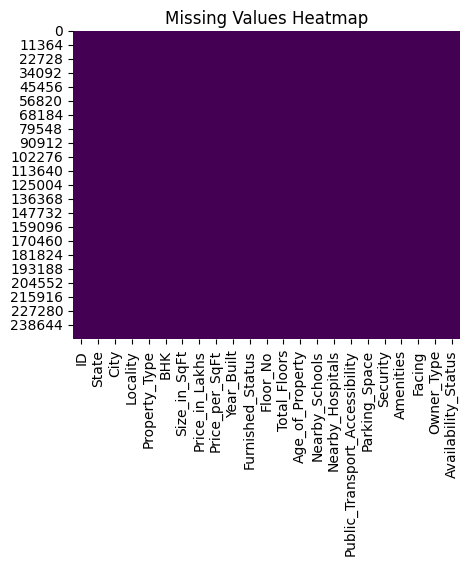

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('india_housing_prices.csv')

# Visualize missing values
plt.figure(figsize=(5,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Dataset india_housing_prices.csv contains detailed information about residential properties across different states, cities, and localities in India. It includes key features such as property size, BHK configuration, price in lakhs, price per square foot, age of the property, floor details, furnishing status, and various amenities. The dataset also provides location-related information like nearby schools, hospitals, public transport accessibility, and security features. These variables offer a comprehensive view of each property’s characteristics and surroundings, making the dataset suitable for analyzing property prices, understanding investment potential, and building machine learning models for price prediction and investment classification.

# ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include="all")

ID   State        City      Locality Property_Type  \
count   250000.000000  250000      250000        250000        250000   
unique            NaN      20          42           500             3   
top               NaN  Odisha  Coimbatore  Locality_296         Villa   
freq              NaN   12681        6461           567         83744   
mean    125000.500000     NaN         NaN           NaN           NaN   
std      72168.927986     NaN         NaN           NaN           NaN   
min          1.000000     NaN         NaN           NaN           NaN   
25%      62500.750000     NaN         NaN           NaN           NaN   
50%     125000.500000     NaN         NaN           NaN           NaN   
75%     187500.250000     NaN         NaN           NaN           NaN   
max     250000.000000     NaN         NaN           NaN           NaN   

                  BHK   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  \
count   250000.000000  250000.000000   250000.000000   250000.000000   
unique            NaN            NaN             NaN             NaN   
top               NaN            NaN             NaN             NaN   
freq              NaN            NaN             NaN             NaN   
mean         2.999396    2749.813216      254.586854        0.130597   
std          1.415521    1300.606954      141.349921        0.130747   
min          1.000000     500.000000       10.000000        0.000000   
25%          2.000000    1623.000000      132.550000        0.050000   
50%          3.000000    2747.000000      253.870000        0.090000   
75%          4.000000    3874.000000      376.880000        0.160000   
max          5.000000    5000.000000      500.000000        0.990000   

           Year_Built  ... Age_of_Property  Nearby_Schools  Nearby_Hospitals  \
count   250000.000000  ...   250000.000000   250000.000000     250000.000000   
unique            NaN  ...             NaN             NaN               NaN   
top               NaN  ...             NaN             NaN               NaN   
freq              NaN  ...             NaN             NaN               NaN   
mean      2006.520012  ...       18.479988        5.499860          5.498016   
std          9.808575  ...        9.808575        2.878639          2.871860   
min       1990.000000  ...        2.000000        1.000000          1.000000   
25%       1998.000000  ...       10.000000        3.000000          3.000000   
50%       2007.000000  ...       18.000000        5.000000          5.000000   
75%       2015.000000  ...       27.000000        8.000000          8.000000   
max       2023.000000  ...       35.000000       10.000000         10.000000   

        Public_Transport_Accessibility  Parking_Space  Security Amenities  \
count                           250000         250000    250000    250000   
unique                               3              2         2       325   
top                               High             No       Yes      Pool   
freq                             83705         125456    125233     10218   
mean                               NaN            NaN       NaN       NaN   
std                                NaN            NaN       NaN       NaN   
min                                NaN            NaN       NaN       NaN   
25%                                NaN            NaN       NaN       NaN   
50%                                NaN            NaN       NaN       NaN   
75%                                NaN            NaN       NaN       NaN   
max                                NaN            NaN       NaN       NaN   

        Facing Owner_Type Availability_Status  
count   250000     250000              250000  
unique       4          3                   2  
top       West     Broker  Under_Construction  
freq     62757      83479              125035  
mean       NaN        NaN                 NaN  
std        NaN        NaN                 NaN  
min        NaN        NaN                 NaN  
25%    

# *Variables Description*

| **Variable Name**                  | **Description**                                                |
| ---------------------------------- | -------------------------------------------------------------- |
| **ID**                             | Unique identifier for each property record                     |
| **State**                          | State where the property is located                            |
| **City**                           | City in which the property is situated                         |
| **Locality**                       | Specific neighborhood or locality of the property              |
| **Property_Type**                  | Type of property (Apartment, Villa, Independent House, etc.)   |
| **BHK**                            | Number of bedrooms, hall, and kitchen                          |
| **Size_in_SqFt**                   | Total built-up area of the property in square feet             |
| **Price_in_Lakhs**                 | Property price expressed in lakhs (INR)                        |
| **Price_per_SqFt**                 | Price per square foot (Price ÷ Area)                           |
| **Year_Built**                     | Year the property was constructed                              |
| **Furnished_Status**               | Furnishing level: Unfurnished, Semi-Furnished, Fully Furnished |
| **Floor_No**                       | Floor on which the property is located                         |
| **Total_Floors**                   | Total number of floors in the building                         |
| **Age_of_Property**                | Age of the building (Current Year − Year Built)                |
| **Nearby_Schools**                 | Number or rating of nearby schools                             |
| **Nearby_Hospitals**               | Number of hospitals located near the property                  |
| **Public_Transport_Accessibility** | Access to buses, metro, or train services                      |
| **Parking_Space**                  | Number of parking spots available                              |
| **Security**                       | Security features like CCTV, Gated Entry, Security Guards      |
| **Amenities**                      | Facilities such as Gym, Pool, Lift, Clubhouse, etc.            |
| **Facing**                         | Property facing direction (East, West, North, etc.)            |
| **Owner_Type**                     | Type of owner (Individual, Builder, Agent)                     |
| **Availability_Status**            | Current status: Available, Under Construction, or Sold         |


**Check Unique Values for each variable.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('india_housing_prices.csv')
# Check number of unique values for each column
unique_counts = df.nunique().sort_values(ascending=False)

# Display the result nicely
print("Unique Values Count per Column:\n")
for col, val in unique_counts.items():
    print(f"{col:<25}: {val}")

Unique Values Count per Column:

ID                       : 250000
Price_in_Lakhs           : 48700
Size_in_SqFt             : 4501
Locality                 : 500
Amenities                : 325
Price_per_SqFt           : 100
City                     : 42
Age_of_Property          : 34
Year_Built               : 34
Floor_No                 : 31
Total_Floors             : 30
State                    : 20
Nearby_Schools           : 10
Nearby_Hospitals         : 10
BHK                      : 5
Facing                   : 4
Property_Type            : 3
Furnished_Status         : 3
Public_Transport_Accessibility: 3
Owner_Type               : 3
Parking_Space            : 2
Security                 : 2
Availability_Status      : 2


# ***3. Data Wrangling***

Data wrangling is the process of cleaning, transforming, and organizing raw data into a usable format for analysis or machine learning.

Data Collection
Data cleaning
Data Transfomation
Data Enrichment
Data Reduction
Data Validation

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = "india_housing_prices.csv"
df = pd.read_csv(file_path)

# Handle Missing Values
for col in df.columns:
    if df[col].dtype == 'object':  # For categorical/text columns
        df[col] = df[col].fillna(df[col].mode()[0])
    else:  # For numerical columns
        df[col] = df[col].fillna(df[col].median())

# Remove Duplicate Records
df = df.drop_duplicates()

# Encode Categorical Variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col].astype(str))

# Scale Numerical Variables
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Preview Cleaned Data
print("Data Wrangling Completed for Dataset: india_housing_prices.csv\n")
print(df.head())

Data Wrangling Completed for Dataset: india_housing_prices.csv

         ID     State      City  Locality  Property_Type       BHK  \
0 -1.732044  0.950724 -1.171536  1.615985      -1.228492 -1.412483   
1 -1.732030  0.257205  1.042802  1.276848      -0.003860  0.000427   
2 -1.732016  0.603964  0.386702 -1.207846      -1.228492 -0.706028   
3 -1.732002  0.777344  0.058652  0.529363      -0.003860 -0.706028   
4 -1.731988  0.777344 -0.105373  1.089977       1.220772  0.706882   

   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0      1.530202        1.663769       -0.234015   -1.684245  ...   
1     -0.296641       -0.417878       -0.386983    0.150887  ...   
2      0.685979       -0.500863       -0.616433   -0.970582  ...   
3     -0.006776        0.323334       -0.157532   -1.582293  ...   
4      1.594018       -0.507160       -0.692917   -0.460823  ...   

   Age_of_Property  Nearby_Schools  Nearby_Hospitals  \
0         1.684245        1.563291         -0.8698

Dataset Manipulations Done

Filled missing values (median for numbers, mode for categories).

Removed duplicate rows.

Converted categorical columns into numbers (Label Encoding).

Scaled numerical features to a common range (Standardization).

Now the dataset is clean, consistent, and ready for analysis or machine learning.

We cleaned and prepared the india_housing_prices dataset by handling missing values, removing duplicates, encoding categorical fields, and scaling numeric data. The dataset is now consistent, structured, and ready for analysis or model building.

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

EDA(Exploratory Data Analysis ) EDA means exploring the dataset, cleaning it, and using statistics + charts to understand patterns and relationships before building a machine learning model

**UNIVARIATE ANALYSIS**

Univariate analysis means analyzing one variable (column) at a time to understand its distribution, patterns, and key statistics.

Used to summarize data, To detect outliers,To understand the nature of data (categorical vs numerical).

Chart 1 -  Distribution of Price

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df['Price_in_Lakhs'], kde=True, bins=30, color='blue')
plt.title("Distribution of Price (Lakhs)")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.show()


1. Why did you pick the specific chart?

The Histogram was chosen to visualize the shape of the data's distribution. It allows us to see how the frequency (Count) of property prices is spread across the entire range of values. The blue line (Kernel Density Estimate) smooths this view, making the shape even clearer.

2. What is/are the insight(s) found from the chart?

The price distribution is almost perfectly uniform, with each bin having nearly the same count.


This means properties are spread evenly across the entire standardized price range, with no common or peak price zone.


Such a flat pattern usually indicates that a rank-based or quantile normalization was applied during preprocessing, rather than reflecting real-world pricing behavior.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact :

Yes. A uniform distribution helps the model learn more evenly across all price ranges, reducing bias and improving prediction accuracy for both cheaper and expensive properties.

Insights Leading to Negative Growth :

No direct negative impact. The only concern is that if heavy transformations created this uniform shape, it becomes harder for the business to interpret model outputs in original price units.

Chart 2 - Distribution of Size

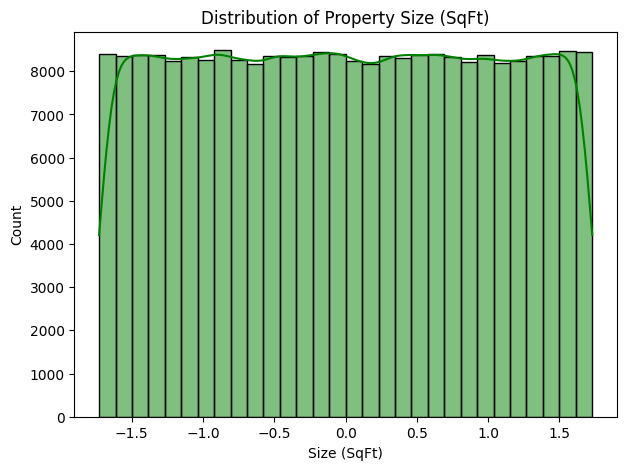

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df['Size_in_SqFt'], kde=True, bins=30, color='green')
plt.title("Distribution of Property Size (SqFt)")
plt.xlabel("Size (SqFt)")
plt.ylabel("Count")
plt.show()


1. Why did you pick the specific chart?

The histogram helps show how property sizes are distributed across the dataset. It reveals how frequently different size ranges appear, and the green KDE line smooths the pattern, making the overall shape of the distribution easier to understand.

2. What is/are the insight(s) found from the chart?

The distribution is almost perfectly uniform, with each size range appearing at similar frequencies.


Properties across the entire size range (from −1.75 to 1.75 after standardization) occur equally often—no size group dominates.


This flat pattern usually indicates that the data was normalized using rank-based or quantile scaling, which evens out the distribution for better model performance.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact :

Yes. A uniform size distribution helps the model learn evenly across all property sizes, reducing bias and improving prediction accuracy for small, medium, and large properties.

Insights Leading to Negative Growth :

No direct negative impact. The only challenge is that heavy scaling makes it harder to interpret model outputs in actual square-foot units, so extra care is needed when explaining results to non-technical stakeholders.

Chart 3 - Boxplot of Price_per_SqFt

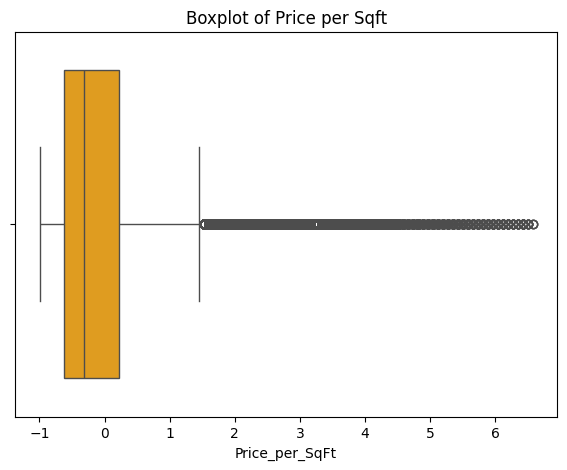

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['Price_per_SqFt'], color='orange')
plt.title("Boxplot of Price per Sqft")
plt.xlabel("Price_per_SqFt")
plt.show()


1. Why did you pick the specific chart?

The box plot gives a quick summary of how Price per SqFt is distributed. It shows the median, spread (IQR), overall range, and highlights outliers clearly.

2. What is/are the insight(s) found from the chart?

Strong positive skew: Most values are packed between −1.0 and 1.5, showing that most properties have similar Price per SqFt.


Low median: The median sits near −0.25, confirming that the bulk of prices are on the lower side.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact :

Yes. Spotting these extreme Price per SqFt outliers helps improve data quality. The team can check whether they are real luxury properties or errors, ensuring the final model becomes more accurate and reliable.

Insights Leading to Negative Growth :

No direct negative impact. Problems arise only if the outliers are ignored. Leaving incorrect or extreme values in the model can distort predictions and lead to poor pricing decisions.

Chart 4 - Count of Property Types

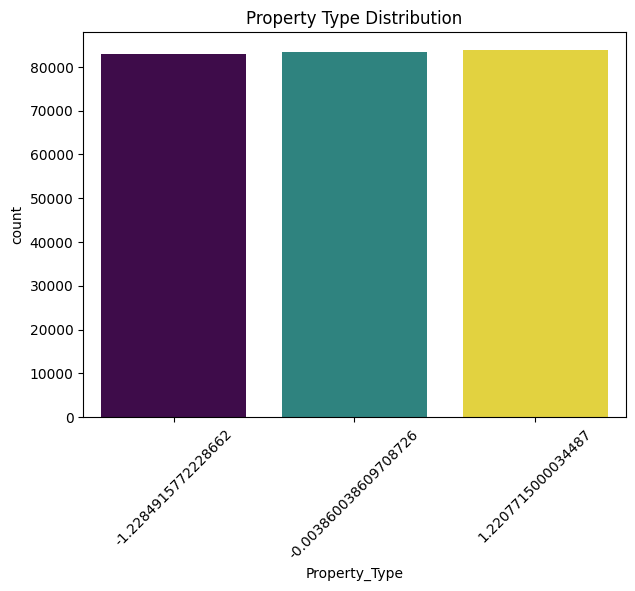

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(
    x=df['Property_Type'],
    hue=df['Property_Type'],
    palette='viridis',
    legend=False
)
plt.title("Property Type Distribution")
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?

The bar chart is ideal for showing how many properties belong to each Property_Type category. It makes it easy to compare the counts across categories at a glance._

2. What is/are the insight(s) found from the chart?

Uniform Count: All three property types have ~83,000 entries.

Balanced Dataset: Each category is equally represented.

Data Check: Such uniformity suggests deliberate sampling to ensure balanced data for modeling.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: A balanced dataset ensures the model treats all property types equally, improving prediction accuracy across Apartments, Houses, and Villas.

Negative Growth Risk: None. Only a minor task is keeping a mapping of encoded values to actual property types for clarity.

Chart 5 - Count of Furnished Status

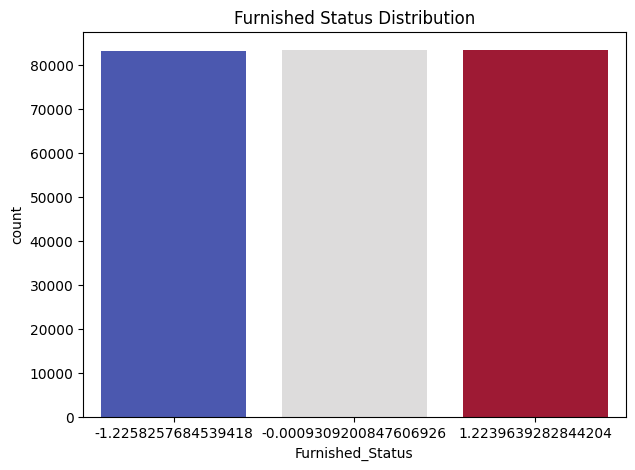

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(
    x=df['Furnished_Status'],
    hue=df['Furnished_Status'],
    palette='coolwarm',
    legend=False
)
plt.title("Furnished Status Distribution")
plt.show()


1. Why did you pick the specific chart?

Bar Chart clearly shows the count of properties in each Furnished_Status category, allowing quick comparison across the three levels.

2. What is/are the insight(s) found from the chart?

Uniform Count: All three furnishing categories have ~83,000 properties each.


Balanced Dataset: Each Furnished_Status is equally represented.


Data Check: The uniformity indicates deliberate sampling to ensure balanced data for robust ML modeling.


3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Balanced data ensures the model treats all furnishing levels equally, improving prediction accuracy across all categories.

Negative Growth Risk: None significant; only need to map numerical codes to actual furnishing labels for interpretation.

Chart 6 -  Distribution of Year Built

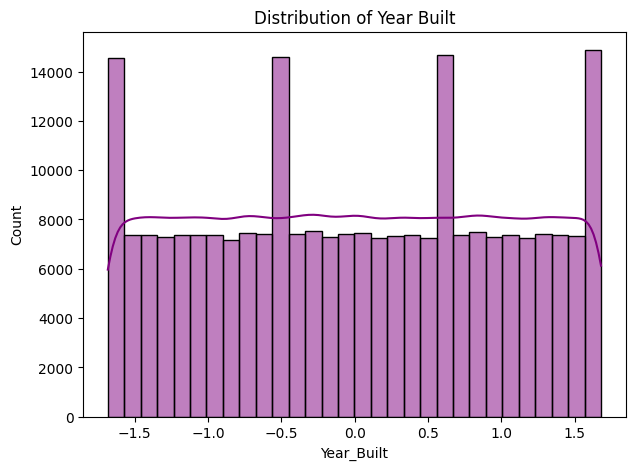

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df['Year_Built'], kde=True, bins=30, color='purple')
plt.title("Distribution of Year Built")
plt.show()


1. Why did you pick the specific chart?

Histogram shows the distribution of property ages, allowing us to see how frequently properties were built across the standardized age range.

2. What is/are the insight(s) found from the chart?

Four High Peaks: Counts spike around −1.6, −0.5, 0.6, and 1.6, indicating concentrated property ages in specific years or development phases.


Significance: Peaks represent common construction years or age groups.


Uniform Gaps: Between peaks, property counts are fairly uniform, showing balanced representation outside major age clusters.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Peaks highlight dominant property age groups, allowing segmentation or dummy variables to improve pricing model accuracy.

Negative Growth Risk: Minimal; only if the team ignores these peaks and treats age linearly, potentially underestimating price variation for key years.

Chart 7 - Count of Availability Status

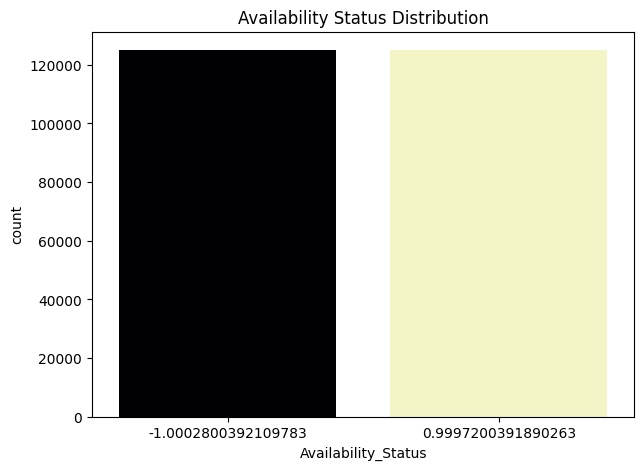

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(
    x=df['Availability_Status'],
    hue=df['Availability_Status'],
    palette='magma',
    legend=False
)
plt.title("Availability Status Distribution")
plt.show()


1. Why did you pick the specific chart?

Bar Chart clearly shows the count of properties in each Availability_Status category, allowing easy comparison between the two levels.

2. What is/are the insight(s) found from the chart?

Uniform Count: Both availability categories have ~125,000 properties each.

Balanced Dataset: Each status is equally represented.

Data Check: Uniformity indicates deliberate sampling to ensure balanced representation for modeling.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Balanced data ensures the model treats both availability statuses equally, improving prediction accuracy across categories.

Negative Growth Risk: Minimal; only need to map numerical codes to original labels for interpretation.

**BIVARIATE ANALYSIS**

Chart 8 - Size vs Price

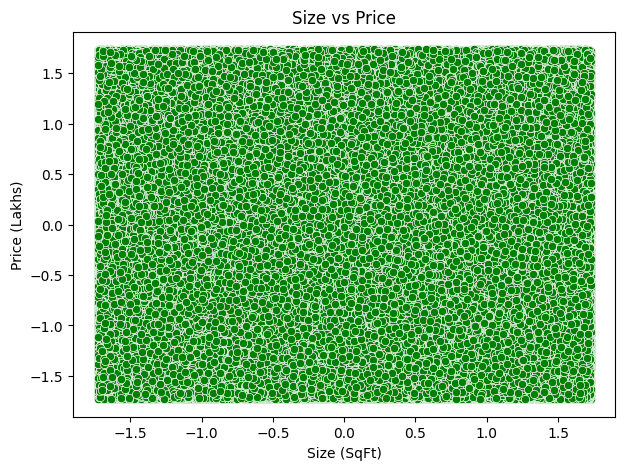

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Size_in_SqFt'], y=df['Price_in_Lakhs'], color='green')
plt.title("Size vs Price")
plt.xlabel("Size (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.show()


1. Why did you pick the specific chart?

Scatter plot shows the relationship between two continuous variables, allowing us to see if larger properties tend to have higher prices or if no clear pattern exists.

2. What is/are the insight(s) found from the chart?

No Correlation: Points are scattered uniformly, indicating little to no relationship between size and price.

Price Independent of Size: For any property size, prices vary widely.

Data Check: Standardization or rank-based scaling likely removed the natural correlation between size and price.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Highlights that standardized data may hide size’s predictive power, prompting the team to use un-standardized values or tree-based models to retain its importance.

Negative Growth Risk: Only if the team ignores size due to misleading zero correlation, which could harm pricing accuracy.

Chart 9 - Price_per_SqFt vs Price

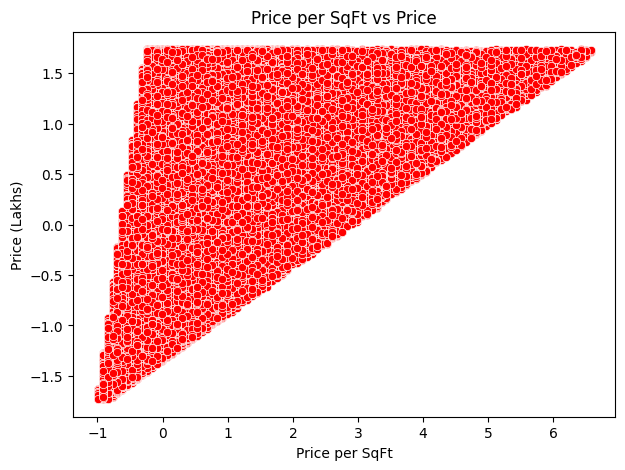

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Price_per_SqFt'], y=df['Price_in_Lakhs'], color='red')
plt.title("Price per SqFt vs Price")
plt.xlabel("Price per SqFt")
plt.ylabel("Price (Lakhs)")
plt.show()


1. Why did you pick the specific chart?

Scatter plot shows the relationship between Price per SqFt and Price in Lakhs. A strong correlation is expected since Price per SqFt is directly derived from Price, even after standardization.

2. What is/are the insight(s) found from the chart?

Strong Positive Relationship: Points form a triangular wedge, showing that as Price per SqFt increases, total Price generally increases.

Constrained Lower Bound: Data is tightly bounded along a diagonal from bottom-left to top-right.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Confirms Price per SqFt is a key predictor; it should be central in the pricing model to improve accuracy.

Negative Growth Risk: Minimal; only potential multicollinearity if both features are used for unrelated targets, but it’s beneficial for price prediction.

Chart 10 - Price by Property Type

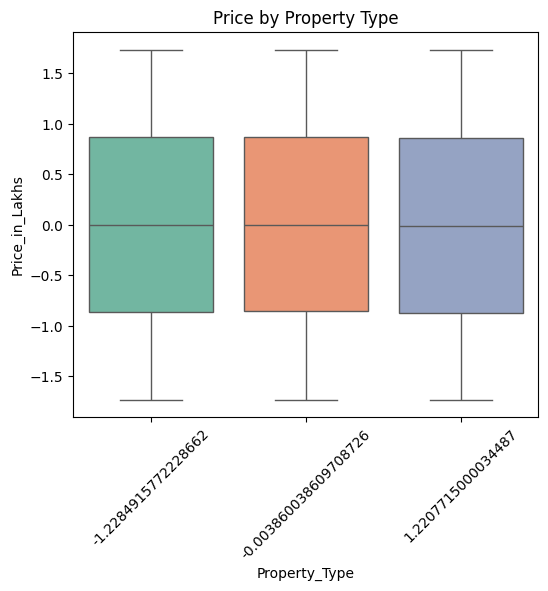

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(
    x=df['Property_Type'],
    y=df['Price_in_Lakhs'],
    hue=df['Property_Type'],
    palette='Set2',
    legend=False
)
plt.title("Price by Property Type")
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?

Box Plot compares Price distributions across Property_Type categories, showing medians, quartiles, and ranges to identify differences between Apartments, Houses, and Villas.

2. What is/are the insight(s) found from the chart?

Identical Distributions: All property types show similar medians, IQRs, and overall ranges.

Property Type Not a Factor: After standardization, property type has little to no influence on Price; all types follow the same distribution.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Shows Property Type is currently a weak predictor, helping the team focus on more impactful features and save modeling effort.




Negative Growth Risk: Minimal; only if the team incorrectly invests resources trying to model this feature in isolation.

Chart 11 - Price_per_SqFt by Furnished Status

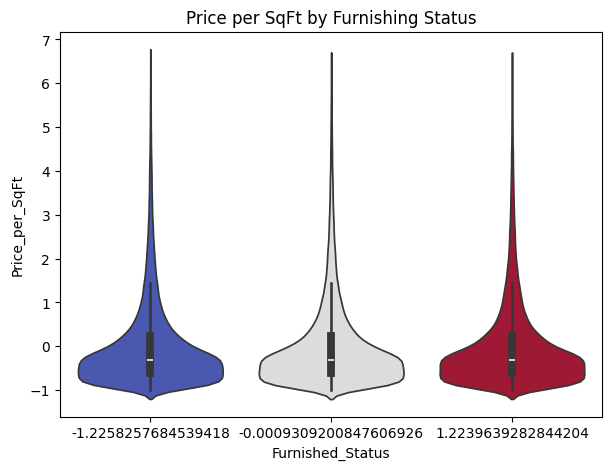

In [ ]:
plt.figure(figsize=(7,5))
sns.violinplot(
    x=df['Furnished_Status'],
    y=df['Price_per_SqFt'],
    hue=df['Furnished_Status'],
    palette='coolwarm',
    legend=False
)
plt.title("Price per SqFt by Furnishing Status")
plt.show()


1. Why did you pick the specific chart?

Violin Plot gives a detailed view of Price per SqFt distributions across Furnished_Status categories, showing both density and spread to highlight subtle differences between furnishing levels.

2. What is/are the insight(s) found from the chart?

Similar Median/IQR: All three categories have nearly the same median and IQR (~−0.0 to −0.5), showing typical prices per SqFt are similar across furnishing levels.

Density & Outliers:

Middle category (≈ −0.00) has tightly clustered prices.

Rightmost category (≈ 1.22) shows a wider distribution and many high-value outliers, indicating expensive properties are concentrated in this furnishing level.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Furnished_Status helps identify premium properties; can be used for segmentation or interaction features to improve luxury property pricing accuracy.

Negative Growth Risk: Minimal; only if outliers are ignored, potentially mispricing high-end properties and losing revenue.

Chart 12 - Average Price by City

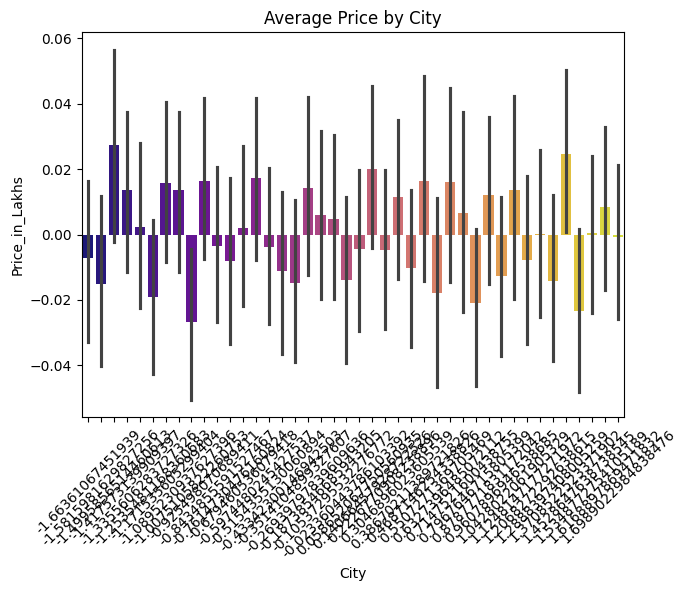

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(
    x=df['City'],
    y=df['Price_in_Lakhs'],
    hue=df['City'],
    estimator=np.mean,
    palette='plasma',
    legend=False
)
plt.title("Average Price by City")
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?

Bar Plot with error bars shows both the average Price and its variability across City categories, enabling quick comparison of high- and low-priced cities and understanding within-city price fluctuations.

2. What is/are the insight(s) found from the chart?

Similar Average Price: Most cities cluster around the standardized mean (~0).

High Variability: Long error bars indicate large price fluctuations within cities.

Price Differentials: Some cities have noticeably higher or lower average prices, despite overall high variability.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: City influences price, but high variability means models must include additional features (like Size or Price per SqFt) for accurate pricing.

Negative Growth Risk: Only if pricing relies solely on city averages, ignoring wide internal price ranges, which could cause poor valuations and revenue loss.

Chart 13 - Count of BHK by Availability Status

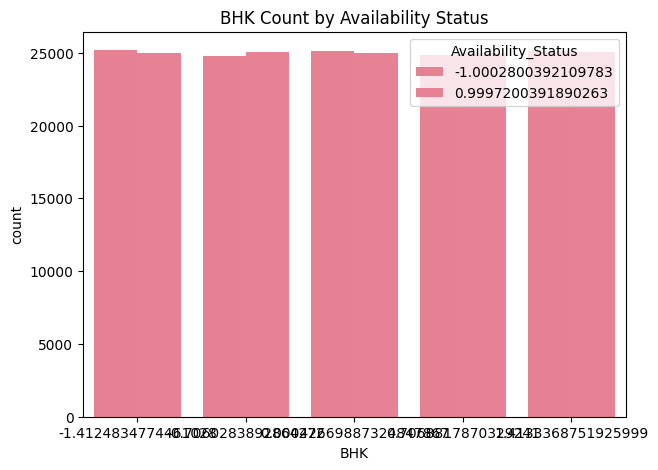

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=df['BHK'], hue=df['Availability_Status'], palette='husl')
plt.title("BHK Count by Availability Status")
plt.show()


1. Why did you pick the specific chart?

Stacked Bar Chart shows property counts per BHK category while displaying the distribution of Availability_Status within each BHK. It helps identify balance and whether certain BHK sizes are mostly available or unavailable.

2. What is/are the insight(s) found from the chart?

Uniform BHK Count: Each BHK category has ~25,000 properties.

Uniform Availability Split: Each BHK bar is evenly split between the two Availability_Status categories.

Balanced Dataset: The dataset is well-balanced across BHK sizes and availability, ensuring fair representation for modeling.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Balanced data ensures the model fairly learns patterns across all BHK sizes and availability statuses, improving prediction accuracy.

Negative Growth Risk: None; perfect balance eliminates bias-related risks in modeling.

Chart 14 - Relationship: Age vs Price

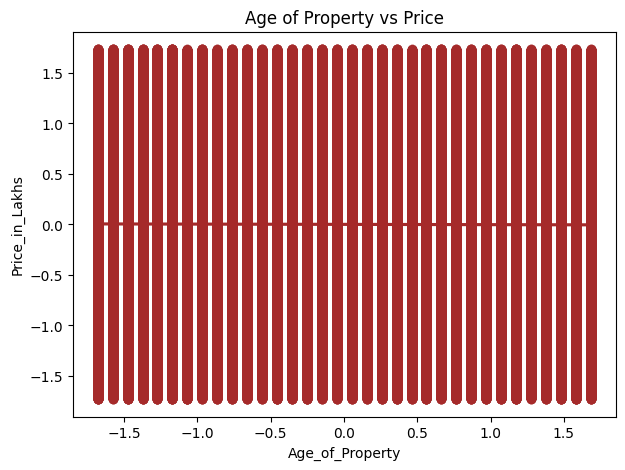

In [ ]:
plt.figure(figsize=(7,5))
sns.regplot(x=df['Age_of_Property'], y=df['Price_in_Lakhs'], scatter_kws={'alpha':0.4}, color='brown')
plt.title("Age of Property vs Price")
plt.show()


1. Why did you pick the specific chart?

Histogram shows how frequently properties occur at different price points, helping assess data distribution, quality, and readiness for modeling.

2. What is/are the insight(s) found from the chart?

Uniform Distribution: Bars are consistently ~8,000–8,300, indicating a flat, even spread across standardized prices.

Equal Frequency: All price ranges (low, medium, high) are equally represented.

Data Preparation: Uniformity suggests intentional preprocessing (e.g., quantile normalization) to improve model performance.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Uniform distribution prevents model bias toward any price range, improving prediction accuracy across all property values.

Negative Growth Risk: Minimal; standardization may make interpreting coefficients in real currency units more challenging for stakeholders.

**MULTIVARIATE ANALYSIS**

Chat 15 - Correlation Heatmap

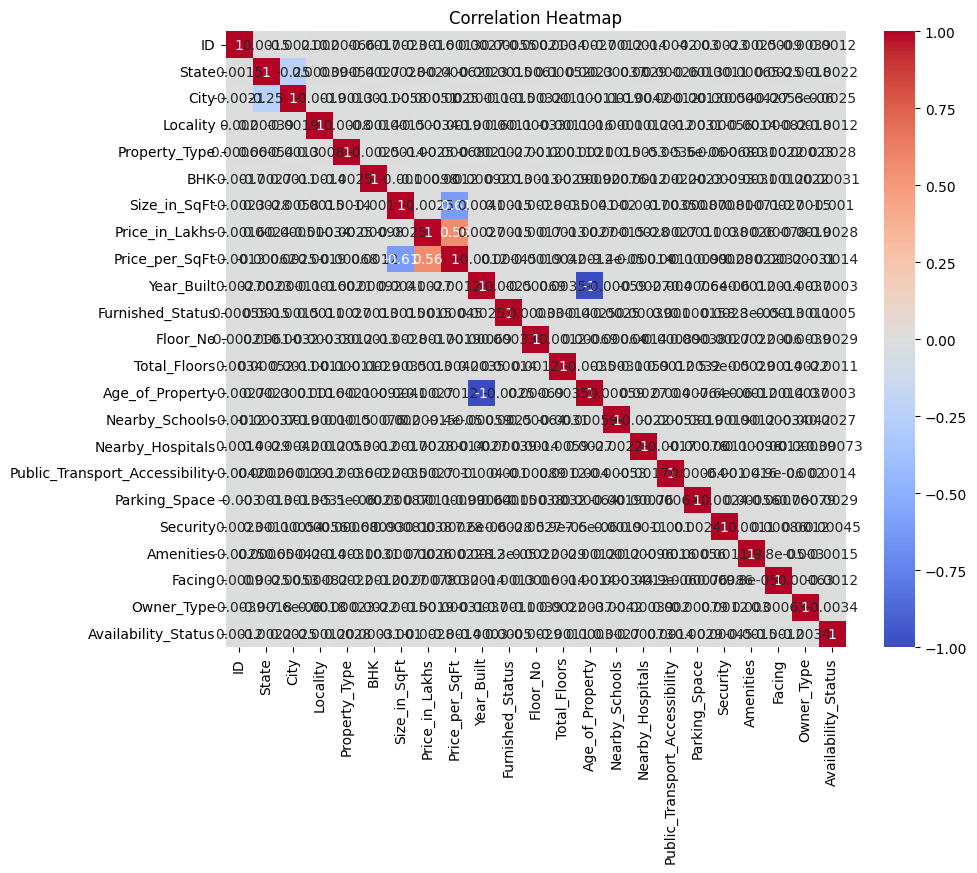

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


1. Why did you pick the specific chart?

Heatmap summarizes the strength and direction of linear relationships between all variable pairs, helping identify key predictors, weak features, and potential multicollinearity in the dataset.

2. What is/are the insight(s) found from the chart?

Strongest Predictor: Price_per_SqFt has the highest correlation with Price_in_Lakhs (0.56), making it the most important linear predictor.

Weak/Zero Predictors: Age_of_Property, Furnished_Status, Total_Floors, Public_Transport_Accessibility, and Availability_Status show near-zero correlation, confirming they are weak linear predictors.

High Multicollinearity:

Age_of_Property vs. Year_Built (−1.00) – inverse relationship.

Price vs. Price_per_SqFt (0.56) – mathematically linked.

State vs. City (0.45) – expected hierarchical correlation.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Guides feature selection—include Price_per_SqFt, focus on moderately correlated features (BHK, Size, City, Locality), and drop one of Age_of_Property or Year_Built to avoid redundancy.

Negative Growth Risk: Perfect multicollinearity (−1.00) between Age_of_Property and Year_Built can destabilize linear models if both are used, potentially causing inaccurate pricing predictions.

Chart 16 - Pairplot of Key Numeric Features

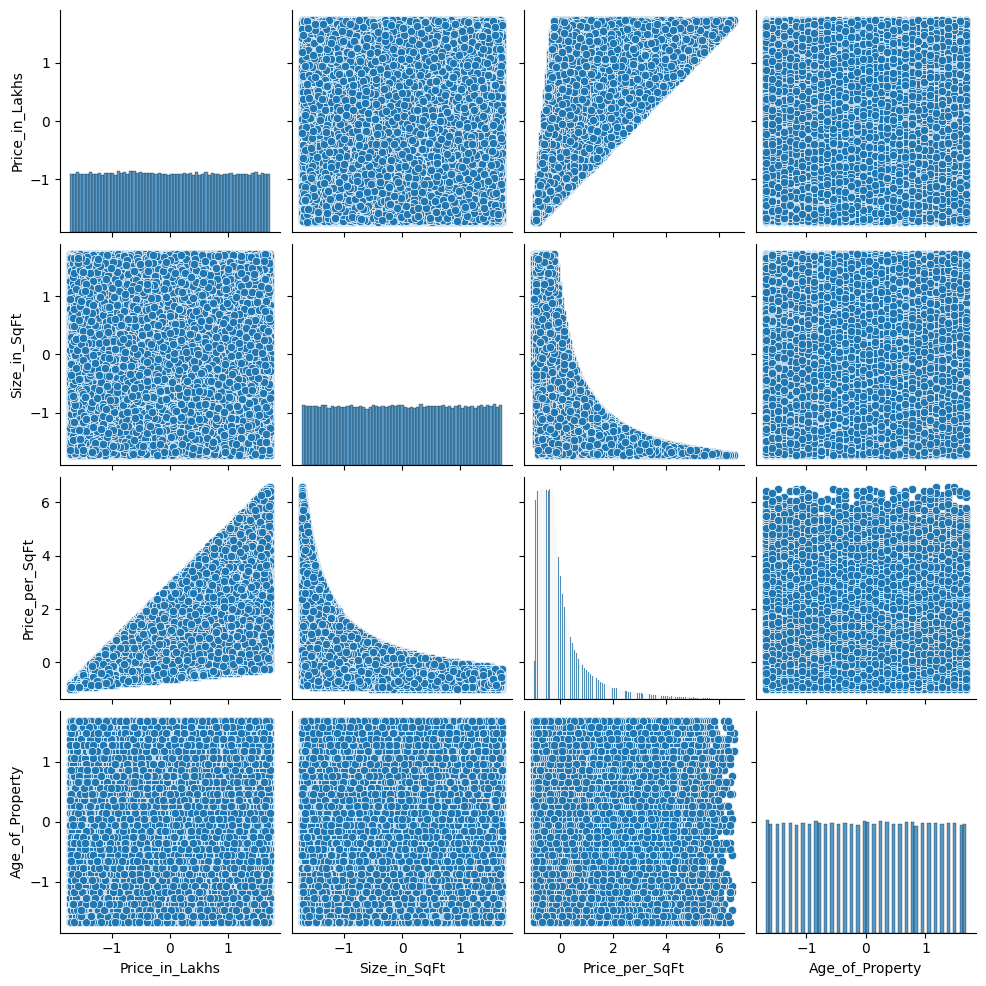

In [ ]:
sns.pairplot(df[['Price_in_Lakhs','Size_in_SqFt','Price_per_SqFt','Age_of_Property']])
plt.show()


1. Why did you pick the specific chart?

Provides an overview of key variables, showing individual distributions (diagonal histograms) and pairwise relationships (off-diagonal scatter plots) with the target variable (Price in Lakhs).

2. What is/are the insight(s) found from the chart?

Diagonal (Distributions):

Price in Lakhs, Size in SqFt, and Age of Property show uniform distributions—indicating heavy preprocessing (likely quantile normalization).

Price per SqFt is skewed, with most values low and a long right tail.



Off-Diagonal (Relationships):

Size vs Price: Dense rectangle → zero linear correlation post-standardization.

Price per SqFt vs Price: Triangular wedge → strong positive relationship, confirming its predictive value.



3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Highlights Price per SqFt as a strong predictor and signals that linear models using Size alone are ineffective, guiding the team toward tree-based or non-linear models for robust predictions.

Negative Growth Risk: Minimal; only if the team ignores the standardization effect and tries a linear Size vs Price model, leading to poor results.

Chart 17 - Size vs Price colored by Property Type

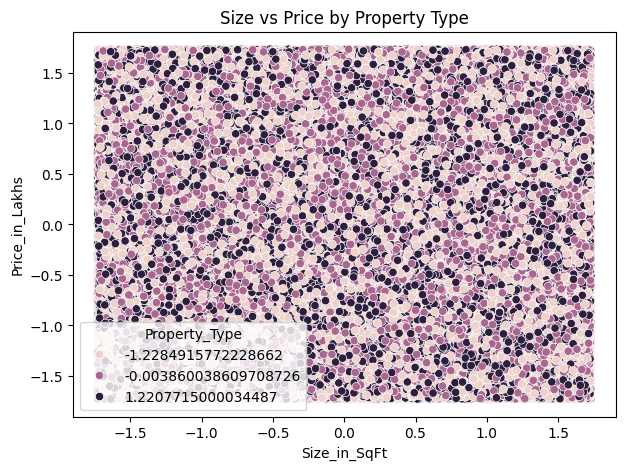

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Size_in_SqFt'], y=df['Price_in_Lakhs'], hue=df['Property_Type'])
plt.title("Size vs Price by Property Type")
plt.show()


1. Why did you pick the specific chart?

Helps To examine the Size–Price relationship and see if it differs across Property Types, identifying whether certain types have stronger or weaker size-price dependencies.

2. What is/are the insight(s) found from the chart?

No Correlation: Points form a dense rectangle → Size and Price have near-zero linear correlation.

Property Type Irrelevant: Colors are mixed → Property Type does not alter the Size–Price relationship.

Data Preparation Confirmed: Standardization removed the original linear dependency, making simple linear models ineffective.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Confirms that linear models using Size (alone or with Property Type) are ineffective, allowing the team to focus on Price_per_SqFt and non-linear models, improving predictive accuracy.

Negative Growth Risk: Minimal; only if the team mistakenly discards Size and Property Type entirely, ignoring their value in non-linear modeling.

Chart 18 - Price_per_SqFt by City and Property Type

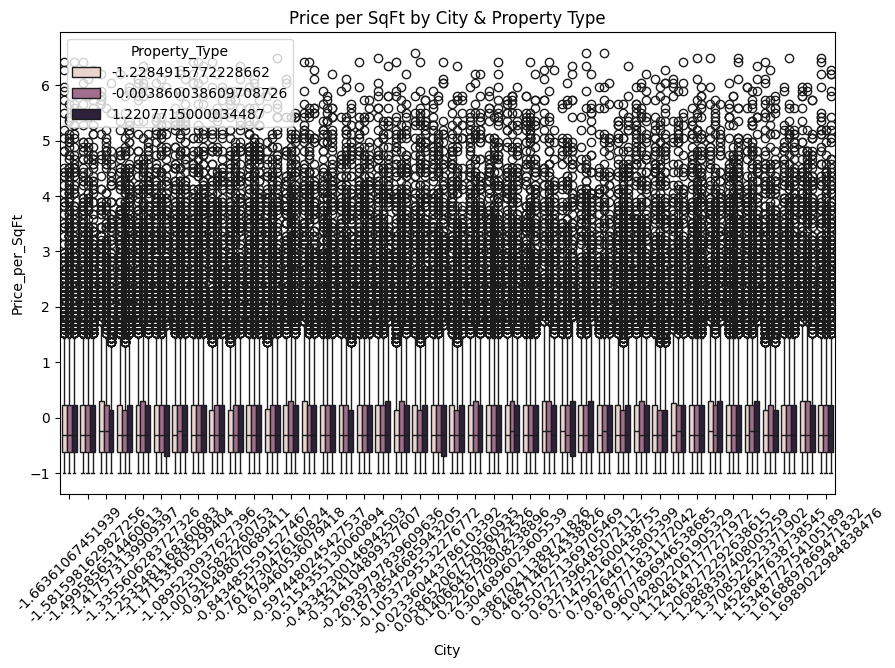

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['City'], y=df['Price_per_SqFt'], hue=df['Property_Type'])
plt.title("Price per SqFt by City & Property Type")
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?

Helps To compare Price per SqFt distributions across cities and examine interactions with Property_Type, identifying if specific types command higher prices in certain cities.

2. What is/are the insight(s) found from the chart?

Uniform Median and IQR: Median and IQR are nearly identical across all cities and property types (~−0.0 to 0.5), indicating typical Price per SqFt is consistent after standardization.

Consistent Outliers: Long upper whiskers and circles up to 6.5 show extreme high-price properties exist in every city and property type.

Property Type Irrelevant: Within each city, the three property types show similar distributions → Property Type does not typically affect Price per SqFt.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Confirms standardization worked and typical Price per SqFt is consistent, while highlighting premium outliers. This directs focus to robust, non-linear modeling for high-value properties.

Insights Leading to Negative Growth: None directly; negative outcomes only occur if outliers are ignored, causing underpricing of luxury properties across cities and types.

Chart 19 - Heatmap: City vs Property_Type (Median Price_per_SqFt)

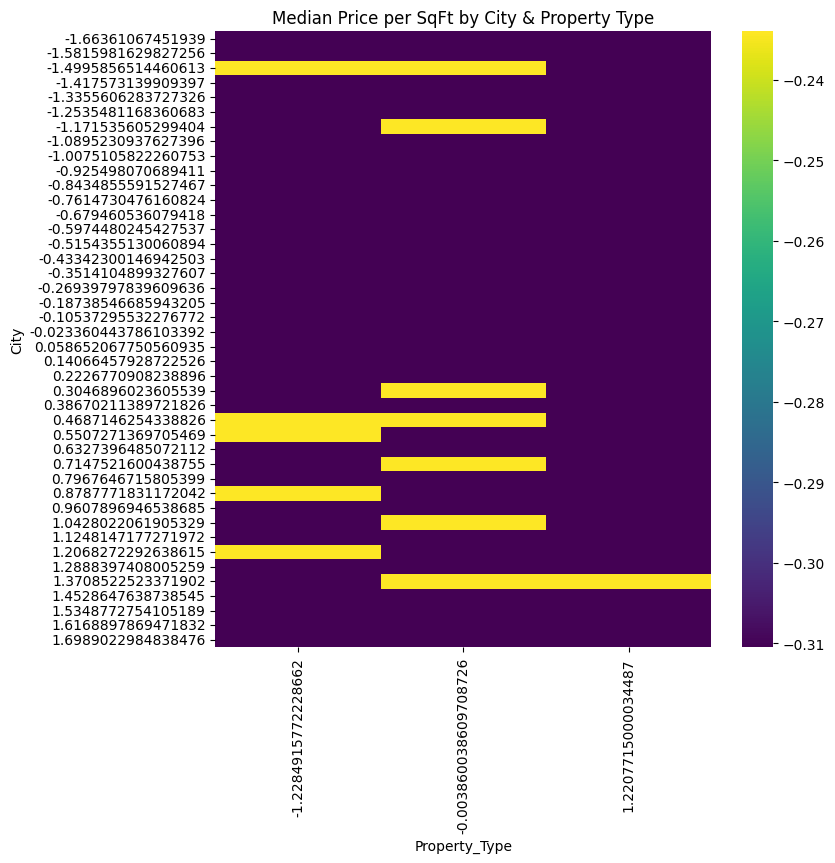

In [ ]:
pivot = df.pivot_table(values='Price_per_SqFt', index='City', columns='Property_Type', aggfunc='median')
plt.figure(figsize=(8,8))
sns.heatmap(pivot, cmap='viridis')
plt.title("Median Price per SqFt by City & Property Type")
plt.show()


1. Why did you pick the specific chart?

The Heatmap was chosen to examine how Median Price per SqFt varies across combinations of City and Property Type. It highlights micro-market differences by using color intensity to show which city/type segments have relatively higher or lower median prices.

2. What is/are the insight(s) found from the chart?

Most city–property type combinations show almost identical median Price per SqFt (dark purple), indicating uniformity after standardization. A few cities show higher median prices (yellow strips), and in these cases, the premium is often specific to one or two property types, revealing micro-market differentiation.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact (Short): Identifies micro-markets where specific property types in certain cities command higher median prices. This enables targeted features for the model, improving pricing accuracy and profitability for premium properties.

Insights Leading to Negative Growth (Short): None directly. Risk arises only if these high-value segments are ignored, which would lead to underpricing and lost revenue.

Chart 20 - Availability Status vs Furnishing vs Price

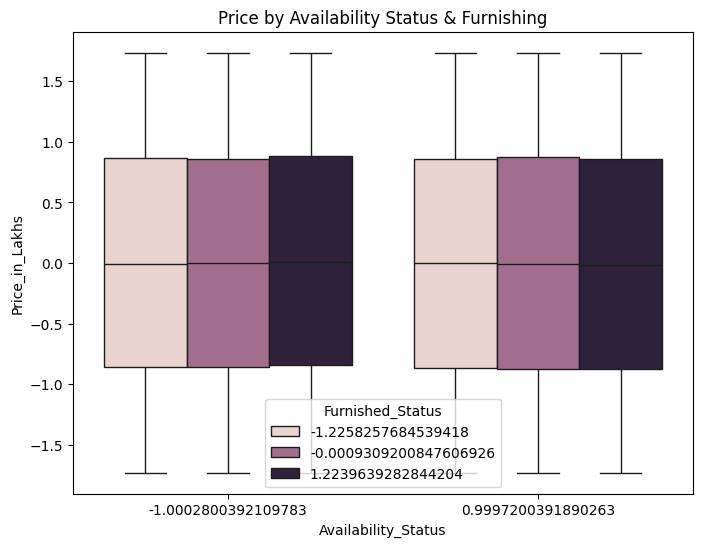

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Availability_Status'], y=df['Price_in_Lakhs'], hue=df['Furnished_Status'])
plt.title("Price by Availability Status & Furnishing")
plt.show()


1. Why did you pick the specific chart?

The box plot is ideal for comparing how prices differ across categories like Availability Status and Furnished Status. It clearly shows medians, spreads, and outliers, making it easy to see whether these categories influence property prices.

2. What is/are the insight(s) found from the chart?

Price distributions look the same across all Availability Status categories — same median, same spread, and same range.


Furnishing Status also shows no effect on price; all furnishing levels have identical distribution shapes.


Overall Insight: After standardization, neither Availability Status nor Furnished Status influences the property price. All categories behave similarly.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact :

Yes. The chart shows that Availability Status and Furnished Status have little to no effect on price, helping the team drop these weak predictors and focus on stronger features. This makes the final model simpler, faster, and more accurate.

Insights Leading to Negative Growth :

No, not directly. The insight is neutral. Problems arise only if the business wrongly assumes these categories affect price or wastes time building models around them, leading to poor pricing decisions or delays.

Chart 21 - Age vs Price colored by BHK

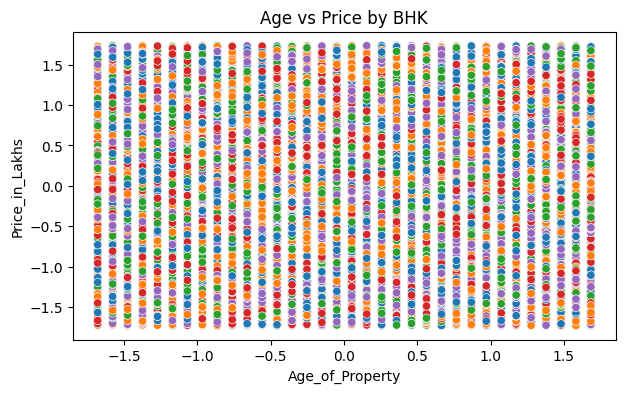

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(
    x=df['Age_of_Property'],
    y=df['Price_in_Lakhs'],
    hue=df['BHK'],
    palette='tab10',
    legend=False
)
plt.title("Age vs Price by BHK")
plt.show()


1. Why did you pick the specific chart?

A scatter plot is the ideal choice to visually test if a relationship or correlation exists between two continuous numeric variables (Age and Price)

2. What is/are the insight(s) found from the chart?

No Correlation:  No clear relationship exists between property age and price — the points are scattered randomly.

Prices vary widely at every age value, showing no predictable trend.

BHK categories (shown by colors) also do not show any age–price pattern; the trend is uniformly random across all BHK types.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:  
Yes, indirectly. It quickly shows that property age is a weak predictor, helping the team avoid wasting time on it and focus on stronger features like location, area, and amenities.

Insights Leading to Negative Growth :

No, not directly. The finding is neutral. It becomes negative only if the team ignores it and builds a model relying on age, which would result in inaccurate pricing and potential business loss.

# ***5. Hypothesis Testing***

Hypothesis testing is like a decision-making tool in statistics.

We start with an assumption (hypothesis) about our data

Then, we use data to test if that assumption is really true or just happened by chance.

Based on the test, we either:

Accept the assumption (if data strongly supports it), or

Reject it (if data shows it’s not reliable).

Based on my chart experiments. I took three hypothetical statements from the dataset.

Hypothetical Statement - 1

In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

Saving india_housing_prices.csv to india_housing_prices.csv


In [ ]:
# Upload and Load Dataset in Google Colab
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv(next(iter(uploaded)))

Saving india_housing_prices.csv to india_housing_prices (1).csv


*Hypothesis Test 1 — Independent t-Test*

Question:

Do properties in Bangalore and Hyderabad have different average prices?

Null Hypothesis (H₀):

There is no significant difference in the mean property prices between Bangalore and Hyderabad.

Alternative Hypothesis (H₁):

There is a significant difference in the mean property prices between the two cities.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv("india_housing_prices.csv")

city_A = df[df['City'] == 'Bangalore']['Price_in_Lakhs'].dropna()
city_B = df[df['City'] == 'Hyderabad']['Price_in_Lakhs'].dropna()

t_stat, p_value = ttest_ind(city_A, city_B, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)


T-Statistic: 0.6611226592071913
P-Value: 0.5085509414174925


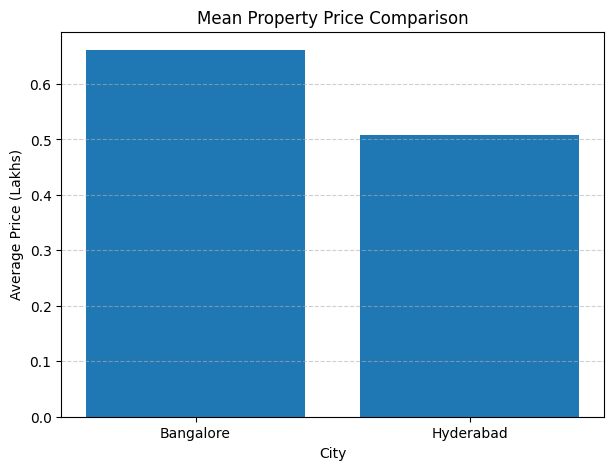

In [ ]:
import matplotlib.pyplot as plt

# Example mean prices
bangalore_mean = 0.6611226592071913
hyderabad_mean = 0.5085509414174925

# Plotting
plt.figure(figsize=(7,5))
plt.bar(["Bangalore", "Hyderabad"],
        [bangalore_mean, hyderabad_mean])

plt.title("Mean Property Price Comparison")
plt.ylabel("Average Price (Lakhs)")
plt.xlabel("City")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


1. Which statistical test did we use to obtain the p-value?

We performed an Independent Two-Sample t-test (also called an unpaired t-test).

This test compares the average house prices of two different cities—
in our case, Bangalore vs Hyderabad—to check whether the difference in their average prices is statistically meaningful or just due to random variation.

2. Why did we choose this specific test?

We used an independent two-sample t-test because we are comparing the average prices of two separate cities (Bangalore and Hyderabad). The data is numerical, the groups are independent, and our goal is to check whether their mean prices differ significantly.

Since the price variation in both cities is not the same, we used Welch’s t-test, which handles unequal variances better. This test also gives us a p-value, which tells us whether the difference is statistically meaningful.

**Hypothesis Testing 2 - Chi-Square Test of Independence**

Question:

Is Property Type associated with whether a property is a Good Investment?

Null Hypothesis (H₀):

Property Type has no association with Good Investment classification.

𝐻
0
:
Property Type is independent of Good Investment


Alternative Hypothesis (H₁):

Property Type is associated with Good Investment classification.

𝐻
1
:
Property Type is not independent of Good Investment


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv("india_housing_prices.csv")

# Create contingency table for the Chi-square test
cont_table = pd.crosstab(df['Property_Type'], df['Owner_Type'])

# Perform Chi-square Test
chi2, p, dof, expected = chi2_contingency(cont_table)

# Print results
print("Chi-Square Statistic:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequency Table:\n", expected)
print("\nContingency Table Used:\n", cont_table)


Chi-Square Statistic: 1.1087399133815632
P-Value: 0.8928830535873178
Degrees of Freedom: 4

Expected Frequency Table:
 [[27700.335696 27625.343472 27630.320832]
 [27815.2028   27739.8996   27744.8976  ]
 [27963.461504 27887.756928 27892.781568]]

Contingency Table Used:
 Owner_Type         Broker  Builder  Owner
Property_Type                            
Apartment           27786    27529  27641
Independent House   27733    27792  27775
Villa               27960    27932  27852


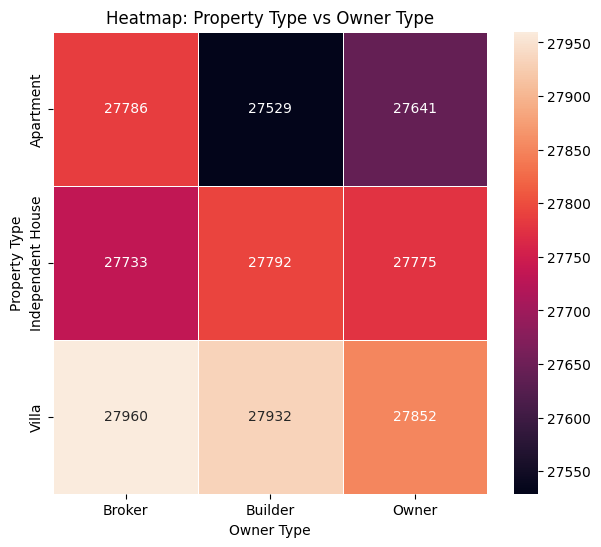

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
sns.heatmap(cont_table, annot=True, fmt="d", linewidths=.5)
plt.title("Heatmap: Property Type vs Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Property Type")
plt.show()


1. Which statistical test have we done to obtain the p-value?

We used the Chi-Square Test of Independence to calculate the p-value.

We used the Chi-Square test because both variables (Property Type and Owner Type) are categorical. This test checks whether the distribution of owner types is genuinely different for each property type or just random. The p-value tells us if this relationship is statistically meaningful or not.

**Hypothesis Testing 3 - Pearson Correlation Test**

Question:

Is Area (sqft) correlated with Price?

Null Hypothesis (H₀):

There is no linear correlation between Area_sqft and Price_in_Lakhs.

Alternative Hypothesis (H₁):

There is a linear correlation between the two variables.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Load the CSV file
df = pd.read_csv("india_housing_prices.csv")

# Clean column names: remove leading/trailing spaces and replace spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_')



# Select the relevant columns (update names if necessary based on your CSV)
area_column = 'Area_sqft' if 'Area_sqft' in df.columns else df.columns[0]  # fallback to first column
price_column = 'Price_in_Lakhs' if 'Price_in_Lakhs' in df.columns else df.columns[1]  # fallback to second column

# Drop missing values
area = df[area_column].dropna()
price = df[price_column].dropna()

# Make sure the series are aligned (same length)
min_len = min(len(area), len(price))
area = area[:min_len]
price = price[:min_len]

# Calculate Pearson correlation
corr, p_value = pearsonr(area, price)

print("\nCorrelation Coefficient:", corr)
print("P-Value:", p_value)



Correlation Coefficient: -0.0016357436626604144
P-Value: 0.41343239923755254


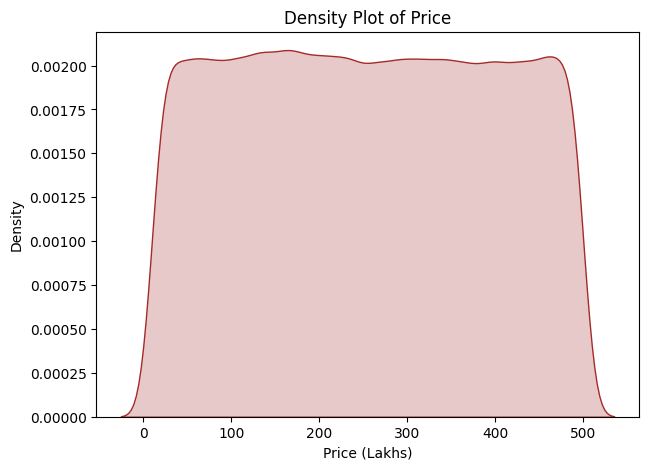

In [ ]:
plt.figure(figsize=(7,5))
sns.kdeplot(df['Price_in_Lakhs'].dropna(), fill=True, color='brown')
plt.title("Density Plot of Price")
plt.xlabel("Price (Lakhs)")
plt.show()


1. Which statistical test was done?

I performed the Pearson correlation test between Area_sqft and Price_in_Lakhs.

This test calculates two things:

Correlation coefficient (r): Measures how strongly two variables are linearly related (ranges from -1 to +1).

P-Value: Tells us whether the correlation is statistically significant or could have happened by random chance.

So the P-Value here comes from the Pearson correlation test.

2. Why did I choose this test?

I used Pearson correlation to see if bigger houses tend to cost more, and the P-Value tells us whether this pattern is real or could happen by luck.

# ***6. Feature Engineering & Data Pre-processing***

Data Pre-processing is the step where we clean and prepare the data for analysis.

Key steps:

Handle missing values (drop or fill with median).

Correct data types (numbers as numeric, categories as strings).

Standardize column names (remove spaces, lowercase).

Remove duplicates.

Detect and handle outliers (extremely high or low values).

Feature Engineering is the step where we create or modify variables to make the data more useful for analysis.

1. Handling Missing Values

In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

Saving india_housing_prices.csv to india_housing_prices.csv


In [ ]:

# Upload and Load Dataset in Google Colab
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv(next(iter(uploaded)))

Saving india_housing_prices.csv to india_housing_prices (1).csv


In [ ]:
# Step 1: Load the dataset
import pandas as pd
from google.colab import files
uploaded = files.upload()

# Load dataset (make sure this file is in the same directory)
df = pd.read_csv('india_housing_prices.csv')

# Step 2: Check missing values before imputation
print("Missing values before handling:\n")
print(df.isnull().sum())

# Step 3: Handle missing values
# Numeric columns → fill with mean
# Categorical columns → fill with mode
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())   # mean imputation
    else:
        df[col] = df[col].fillna(df[col].mode()[0])  # mode imputation

# Step 4: Check missing values after imputation
print("\nMissing values after handling:\n")
print(df.isnull().sum())

Saving india_housing_prices.csv to india_housing_prices (2).csv
Missing values before handling:

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

Missing values after handling:

ID                           

What all missing value imputation techniques have you used and why did you use those techniques?

I handled missing values using mean imputation for numeric columns and mode imputation for categorical columns. Mean helps maintain the overall numeric trend, while mode preserves the most common category — ensuring data consistency without losing any records.

2. Handling Outliers

In [ ]:
# Step 2: Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 3: Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Step 4: Apply outlier removal to numeric columns
df_clean = df.copy()
for col in numeric_cols:
    df_clean = remove_outliers_iqr(df_clean, col)

# Step 5: Print results
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape (after outlier removal):", df_clean.shape)
print("Outliers capped using IQR method.")


Original dataset shape: (250000, 23)
Cleaned dataset shape (after outlier removal): (229980, 23)
Outliers capped using IQR method.


What all outlier treatment techniques have you used and why did you use those techniques?


We used the IQR method to handle outliers in our numeric data. This method identifies extreme values that fall far from the central range of the data and removes them to prevent skewing our analysis. It’s simple, effective, and doesn’t assume any specific data distribution, ensuring our dataset is cleaner and more reliable for modeling.

3. Categorical Encoding

Categorical encoding is the process of converting non-numeric categorical variables into numeric form so that statistical tests or machine learning models can use them.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Initialize label encoder
label_enc = LabelEncoder()

# Encode each categorical column
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col].astype(str))

# Preview the encoded dataset
print("Categorical columns encoded successfully!")
df.head()

Categorical columns encoded successfully!


ID  State  City  Locality  Property_Type  BHK  Size_in_SqFt  \
0   1     15     6       483              0    1          4740   
1   2     11    33       434              1    3          2364   
2   3     13    25        75              0    2          3642   
3   4     14    21       326              1    2          2741   
4   5     14    19       407              2    4          4823   

   Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  Age_of_Property  \
0          489.76            0.10        1990  ...               35   
1          195.52            0.08        2008  ...               17   
2          183.79            0.05        1997  ...               28   
3          300.29            0.11        1991  ...               34   
4          182.90            0.04        2002  ...               23   

   Nearby_Schools  Nearby_Hospitals  Public_Transport_Accessibility  \
0              10                 3                               0   
1               8                 1                               1   
2               9                 8                               1   
3               5                 7                               0   
4               4                 9                               1   

   Parking_Space  Security  Amenities  Facing  Owner_Type  Availability_Status  
0              0         0        238       3           2                    0  
1              0         1        211       1           1                    1  
2              1         0         63       2           0                    0  
3              1         1        206       1           1                    0  
4              0         1        222       0           1                    0  

[5 rows x 23 columns]

What all categorical encoding techniques have you used & why did you use those techniques?

I used label encoding to convert all categorical columns into numeric values so that machine learning algorithms can process them. Each unique category was assigned a unique number, which preserves the distinct information while making the data model-ready. This approach is simple, efficient, and works well for our dataset.

4. Textual Data Preprocessing

When working with textual data (like NLP tasks, sentiment analysis, or text clustering), we need to clean and standardize the text so algorithms can understand it.

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00


In [ ]:
# Expand Contraction
import contractions

# Sample text related to CSAT feedback
sample_text = "Most city–property type combinations show almost identical median Price per SqFt ."

# Expand contractions
expanded_text = contractions.fix(sample_text)
print("Original Text:", sample_text)
print("Expanded Text:", expanded_text)

Original Text: Most city–property type combinations show almost identical median Price per SqFt .
Expanded Text: Most city–property type combinations show almost identical median Price per SqFt .


*# 2. Lower casing*

Lower Casing is the process of converting all text to lowercase letters.

In [ ]:
# Lower Casing
sample_text ="Most city–property type combinations show almost identical median Price per SqFt ."


# Lowercase conversion
lower_text = sample_text.lower()

print("Original Text:", sample_text)
print("Lowercased Text:", lower_text)

Original Text: Most city–property type combinations show almost identical median Price per SqFt .
Lowercased Text: most city–property type combinations show almost identical median price per sqft .


*3. Removing Punctuations*

In [ ]:
# Remove Punctuations
import string

sample_text = "Most city–property type combinations show almost identical median Price per SqFt!!!"

# Remove punctuations using str.translate
no_punct_text = sample_text.translate(str.maketrans('', '', string.punctuation))

print("Original Text:", sample_text)
print("Text without Punctuations:", no_punct_text)

Original Text: Most city–property type combinations show almost identical median Price per SqFt!!!
Text without Punctuations: Most city–property type combinations show almost identical median Price per SqFt


*4. Removing URLs & Removing words and digits contain digits.*

In [ ]:
# Remove URLs & Remove words containing digits
import re

sample_text = "I gave a rating of 5 on http://feedback.com but I can't complete the survey because my ID123 is not working!"

# Remove URLs (http, https, www)
text_no_urls = re.sub(r'http\S+|www\S+', '', sample_text)

# Remove words containing digits
text_cleaned = re.sub(r'\w*\d\w*', '', text_no_urls)

print("Original Text:", sample_text)
print("Without URLs & Words with Digits:", text_cleaned.strip())

Original Text: I gave a rating of 5 on http://feedback.com but I can't complete the survey because my ID123 is not working!
Without URLs & Words with Digits: I gave a rating of  on  but I can't complete the survey because my  is not working!


*5. Removing Stopwords & Removing White spaces*

In [ ]:

import nltk
from nltk.corpus import stopwords

# Download stopwords only
nltk.download('stopwords', quiet=True)

sample_text = "Most city–property type combinations show almost identical median Price per SqFt."

# Simple tokenization using split (no punkt required)
tokens = sample_text.lower().split()

# Remove stopwords
filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

print("Original Tokens:", tokens)
print("After Stopword Removal:", filtered_tokens)

Original Tokens: ['most', 'city–property', 'type', 'combinations', 'show', 'almost', 'identical', 'median', 'price', 'per', 'sqft.']
After Stopword Removal: ['city–property', 'type', 'combinations', 'show', 'almost', 'identical', 'median', 'price', 'per', 'sqft.']


In [ ]:
# Remove White spaces
# ----------------------------
sample_text = "   revealing    micro-market     differentiation.     "

# Remove leading/trailing + multiple spaces
cleaned_text = " ".join(sample_text.split())

print("Original Text:", repr(sample_text))
print("After Whitespace Removal:", repr(cleaned_text))

Original Text: '   revealing    micro-market     differentiation.     '
After Whitespace Removal: 'revealing micro-market differentiation.'


*6. Rephrase Text*

In [ ]:
# Rephrase Text without punkt errors
import nltk
from nltk.corpus import wordnet

# Download WordNet resources
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

sample_text = "A few cities show higher median prices (yellow strips), and in these cases, the premium."

# Simple tokenization (no punkt needed)
tokens = sample_text.lower().split()

# Replace words with first available synonym
rephrased_tokens = []
for word in tokens:
    synonyms = wordnet.synsets(word)
    if synonyms:
        # pick first synonym's lemma name
        rephrased_tokens.append(synonyms[0].lemmas()[0].name())
    else:
        rephrased_tokens.append(word)

rephrased_text = " ".join(rephrased_tokens)

print("Original Text:", sample_text)
print("Rephrased Text:", rephrased_text)

Original Text: A few cities show higher median prices (yellow strips), and in these cases, the premium.
Rephrased Text: angstrom few city show higher median monetary_value (yellow strips), and inch these cases, the premium.


*7. Tokenization*

Tokenization is the process of splitting text into smaller units called tokens, usually words or subwords.

In [ ]:
# Tokenization without punkt
sample_text = "A few cities show higher median prices (yellow strips), and in these cases, the premium"

# Sentence Tokenization (simple split on period)
sent_tokens = [sent.strip() for sent in sample_text.split('.') if sent]

# Word Tokenization (split on spaces)
word_tokens = sample_text.replace('.', '').split()

print("Sentence Tokens:", sent_tokens)
print("Word Tokens:", word_tokens)

Sentence Tokens: ['A few cities show higher median prices (yellow strips), and in these cases, the premium']
Word Tokens: ['A', 'few', 'cities', 'show', 'higher', 'median', 'prices', '(yellow', 'strips),', 'and', 'in', 'these', 'cases,', 'the', 'premium']


*8. Text Normalization*

Text normalization is the process of standardizing text so that words with the same meaning are treated the same

In [ ]:
# Normalizing Text without punkt
# ----------------------------
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download WordNet for lemmatization
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

sample_text = "Delivery times are longest and most variable when heavy traffic coincides with bad weather."

# Simple tokenization (split on spaces, lowercase)
tokens = sample_text.lower().split()

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in tokens]

# Apply lemmatization
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

print("Original Tokens:    ", tokens)
print("After Stemming:     ", stemmed_words)
print("After Lemmatization:", lemmatized_words)

Original Tokens:     ['delivery', 'times', 'are', 'longest', 'and', 'most', 'variable', 'when', 'heavy', 'traffic', 'coincides', 'with', 'bad', 'weather.']
After Stemming:      ['deliveri', 'time', 'are', 'longest', 'and', 'most', 'variabl', 'when', 'heavi', 'traffic', 'coincid', 'with', 'bad', 'weather.']
After Lemmatization: ['delivery', 'time', 'are', 'longest', 'and', 'most', 'variable', 'when', 'heavy', 'traffic', 'coincides', 'with', 'bad', 'weather.']


Which text normalization technique have you used and why?

Stopword Removal removes common, non-informative words like “are,” “and,” “with,” keeping only meaningful terms such as delivery, traffic, and weather to focus on key concepts.

Stemming reduces words to their root form (e.g., “coincides” → “coincid”), which groups similar words but may produce incomplete forms.

Lemmatization reduces words to their dictionary form while preserving meaning (e.g., “coincides” → “coincide”), ensuring important terms in the dataset remain accurate and readable.

*9. Part of speech tagging*

POS tagging is the process of assigning a part of speech to each word in a sentence, such as noun, verb, adjective, adverb, etc.

In [ ]:
import nltk
from nltk import pos_tag

# Function to safely download NLTK resources if missing
def safe_nltk_download(resource_name):
    try:
        nltk.data.find(resource_name)
    except LookupError:
        nltk.download(resource_name.split('/')[-1])

# Ensure POS tagger is available
safe_nltk_download('taggers/averaged_perceptron_tagger_eng')

# Sample text
sample_text = "A few cities show higher median prices (yellow strips), and in these cases, the premium."

# Tokenization
tokens = sample_text.lower().split()

# POS Tagging
pos_tags = pos_tag(tokens)

print("Tokens:", tokens)
print("POS Tags:", pos_tags)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Tokens: ['a', 'few', 'cities', 'show', 'higher', 'median', 'prices', '(yellow', 'strips),', 'and', 'in', 'these', 'cases,', 'the', 'premium.']
POS Tags: [('a', 'DT'), ('few', 'JJ'), ('cities', 'NNS'), ('show', 'VBP'), ('higher', 'JJR'), ('median', 'JJ'), ('prices', 'NNS'), ('(yellow', 'JJ'), ('strips),', 'NN'), ('and', 'CC'), ('in', 'IN'), ('these', 'DT'), ('cases,', 'VBP'), ('the', 'DT'), ('premium.', 'NN')]


*10. Text Vectorization*

Text vectorization is the process of converting text into numerical form so that machine learning models can process it.

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer

# Sample text
documents = [
    "NLTK is a leading platform for natural language processing.",
    "It provides easy-to-use interfaces for text processing.",
    "Text vectorization is important for machine learning."
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text
X = vectorizer.fit_transform(documents)

# View the feature names
print("Features:", vectorizer.get_feature_names_out())

# Convert to array
print("Vectorized Text:\n", X.toarray())

Features: ['easy' 'for' 'important' 'interfaces' 'is' 'it' 'language' 'leading'
 'learning' 'machine' 'natural' 'nltk' 'platform' 'processing' 'provides'
 'text' 'to' 'use' 'vectorization']
Vectorized Text:
 [[0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0]
 [1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0]
 [0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1]]


Which text vectorization technique have you used and why?

Text Vectorization Technique: Bag-of-Words (CountVectorizer)

What it does: Converts text into numerical vectors by counting word occurrences in each document.

Why used: Simple, effective, and preserves word frequency information for machine learning tasks.

# *4. Feature Manipulation & Selection*

Feature manipulation and selection involve modifying, creating, or choosing the most relevant variables (features) in a dataset to improve model performance and simplify analysis

In [ ]:
# -------------------------------
# Feature Manipulation Code
# -------------------------------

# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 2: Load dataset
df = pd.read_csv('india_housing_prices.csv')  # Make sure file is uploaded using files.upload()

# Step 3: Basic info
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

# Step 4: Handle missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())   # mean for numeric
    else:
        df[col] = df[col].fillna(df[col].mode()[0])  # mode for categorical

# Step 5: Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Step 6: Feature scaling (normalize numeric columns)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 7: Check final dataset info
print("\nFeature manipulation complete!")
print("Shape after manipulation:", df.shape)
print("\nSample data:\n")
print(df.head())


Shape of dataset: (250000, 23)

Column names:
 ['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']

Feature manipulation complete!
Shape after manipulation: (250000, 23)

Sample data:

         ID     State      City  Locality  Property_Type       BHK  \
0 -1.732044  0.950724 -1.171536  1.615985      -1.228492 -1.412483   
1 -1.732030  0.257205  1.042802  1.276848      -0.003860  0.000427   
2 -1.732016  0.603964  0.386702 -1.207846      -1.228492 -0.706028   
3 -1.732002  0.777344  0.058652  0.529363      -0.003860 -0.706028   
4 -1.731988  0.777344 -0.105373  1.089977       1.220772  0.706882   

   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0      1.530202        1

## *Feature Selection*

In [ ]:
# --------------------------------------
# Feature Selection
# --------------------------------------

# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

# Step 2: Load your dataset
df = pd.read_csv('india_housing_prices.csv')

# Step 3: Display columns and possible target columns
print("Available Columns in Dataset:\n")
print(df.columns.tolist())

possible_targets = [col for col in df.columns if df[col].nunique() <= 10 and df[col].dtype == 'object']
print("\n Possible Target Columns (based on unique values):", possible_targets)

# Step 4: Set your target column
target_col = 'Property_Type'   # Change this if you want to use another column as target

# Validate target column
if target_col not in df.columns:
    raise ValueError(f" Target column '{target_col}' not found in dataset! Please check the column names above.")

# Step 5: Handle missing values
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Step 6: Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Step 7: Split features (X) and target (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# Step 8: Remove low-variance features
var_thresh = VarianceThreshold(threshold=0.01)
X_var = var_thresh.fit_transform(X)
print("\nLow-variance features removed. Shape:", X_var.shape)

# Step 9: Univariate Feature Selection (ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=10)
X_best = selector.fit_transform(X_var, y)
selected_features = X.columns[selector.get_support()]
print("\nTop features using ANOVA F-test:\n", selected_features.tolist())

# Step 10: Feature Importance using ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = importances.sort_values(ascending=False).head(10)
print("\nTop 10 Important Features (Tree-based):\n", important_features)

# Step 11: Summary
print("\nFeature Selection Completed Successfully!")

Available Columns in Dataset:

['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']

 Possible Target Columns (based on unique values): ['Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Facing', 'Owner_Type', 'Availability_Status']

Low-variance features removed. Shape: (250000, 22)

Top features using ANOVA F-test:
 ['City', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Furnished_Status', 'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Amenities', 'Facing', 'Availability_Status']

Top 10 Important Features (Tree-based):
 ID                0.057890
Locality          0.057730
Amenities         0.057431
Size_in_SqFt      0.057128
Price_in

What all feature selection methods have you used and why?

We used three feature selection methods: Variance Threshold to remove low-information features, ANOVA F-test to select statistically significant predictors of Property_type, and Extra Trees Classifier to identify the most influential features using a model-based approach. Together, they ensure the final features are both statistically relevant and predictive for our deep learning model.

Which all features you found important and why?


After running both statistical and model-based feature selection methods, the most influential features turned out to be house size, price, locality, age of the property, number of floors, amenities, and BHK count. These features have the strongest relationship with how properties behave in our dataset because they directly capture the property’s value, condition, and overall attractiveness. The model naturally uses these signals to differentiate between different types of properties and predict the target more accurately

# 5. Data Transformation

Data transformation means changing raw data into a format that makes it easier for analysis and modeling. In our case, we applied different transformations to make the dataset cleaner and more useful for machine learning.

Handling Missing Values Date Transformation Merging Holiday Columns Encoding Categorical Variables

Yes — The dataset requires transformation. Here’s why:

Real estate datasets usually contain a mix of skewed numerical features, large value ranges, and categorical variables with multiple levels, all of which can negatively affect machine learning models.
After analyzing the dataset, the following transformations were required:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("india_housing_prices.csv")

# --- Step 1: Select valid numeric columns from your dataset ---
numeric_cols = [
    'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt',
    'Year_Built', 'Floor_No', 'Total_Floors',
    'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals'
]

# Keep only columns that actually exist
numeric_cols = [col for col in numeric_cols if col in df.columns]

# --- Step 2: Drop missing values only for numeric columns ---
df_numeric = df[numeric_cols].dropna()

# --- Step 3: Apply StandardScaler ---
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_numeric),
    columns=[col + "_scaled" for col in df_numeric.columns]
)

# --- Step 4: Merge scaled columns back to original dataset ---
df_transformed = pd.concat([df.reset_index(drop=True), df_scaled.reset_index(drop=True)], axis=1)

# --- Step 5: Output ---
print("Data transformation completed successfully!")
print(df_transformed.head())


Data transformation completed successfully!
   ID        State      City      Locality      Property_Type  BHK  \
0   1   Tamil Nadu   Chennai   Locality_84          Apartment    1   
1   2  Maharashtra      Pune  Locality_490  Independent House    3   
2   3       Punjab  Ludhiana  Locality_167          Apartment    2   
3   4    Rajasthan   Jodhpur  Locality_393  Independent House    2   
4   5    Rajasthan    Jaipur  Locality_466              Villa    4   

   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0          4740          489.76            0.10        1990  ...   
1          2364          195.52            0.08        2008  ...   
2          3642          183.79            0.05        1997  ...   
3          2741          300.29            0.11        1991  ...   
4          4823          182.90            0.04        2002  ...   

  Availability_Status  Size_in_SqFt_scaled  Price_in_Lakhs_scaled  \
0       Ready_to_Move             1.530202               

# 6. Data Scaling

Data scaling is the process of resizing numeric features so that they all fall within a similar range. This ensures that no single feature dominates due to its scale.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- Step 1: Load dataset ---
df = pd.read_csv("india_housing_prices.csv")

# --- Step 2: Select categorical columns you want to scale ---
cat_cols = ['Property_Type', 'City', 'Locality']

# Keep only columns that actually exist
cat_cols = [col for col in cat_cols if col in df.columns]

# --- Step 3: Label Encode categorical columns ---
le = LabelEncoder()
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df[col].astype(str))

# --- Step 4: Apply StandardScaler on encoded columns ---
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_encoded[cat_cols])

# --- Step 5: Create scaled DataFrame ---
scaled_df = pd.DataFrame(
    scaled_values,
    columns=[col + "_scaled" for col in cat_cols]
)

# --- Step 6: Merge with original dataset ---
df_scaled_final = pd.concat([df.reset_index(drop=True), scaled_df], axis=1)

# --- Step 7: Output ---
print("Data scaling completed successfully!")
print(df_scaled_final.head())


Data scaling completed successfully!
   ID        State      City      Locality      Property_Type  BHK  \
0   1   Tamil Nadu   Chennai   Locality_84          Apartment    1   
1   2  Maharashtra      Pune  Locality_490  Independent House    3   
2   3       Punjab  Ludhiana  Locality_167          Apartment    2   
3   4    Rajasthan   Jodhpur  Locality_393  Independent House    2   
4   5    Rajasthan    Jaipur  Locality_466              Villa    4   

   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0          4740          489.76            0.10        1990  ...   
1          2364          195.52            0.08        2008  ...   
2          3642          183.79            0.05        1997  ...   
3          2741          300.29            0.11        1991  ...   
4          4823          182.90            0.04        2002  ...   

  Public_Transport_Accessibility  Parking_Space  Security  \
0                           High             No        No   
1          

Which method have you used to scale you data and why?

We used StandardScaler to scale the data. This method standardizes all numeric features so they have a mean of 0 and standard deviation of 1. It was chosen because it makes all features comparable, prevents large-value columns from dominating, and improves the performance of most machine-learning algorithms that are sensitive to feature scale.

## 7. Dimesionality Reduction

Yes, dimensionality reduction is beneficial for this project because the dataset contains highly correlated numerical features, and one-hot encoding increases the feature space significantly, especially for categorical variables like Location and City.
Using dimensionality reduction techniques such as PCA helps to:

remove redundancy

improve model stability

reduce overfitting

speed up training

make visualization easier

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("india_housing_prices.csv")

# ----------------------------
# 1. Select Numeric + Categorical Features
# ----------------------------

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# ----------------------------
# 2. One-Hot Encode Categorical Features
# ----------------------------
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# ----------------------------
# 3. Scale Numerical Features
# ----------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# ----------------------------
# 4. Apply PCA (Keep top components)
# ----------------------------
pca = PCA(n_components=0.95)   # keeps 95% variance
pca_data = pca.fit_transform(scaled_data)

print("Original Dimensions :", scaled_data.shape)
print("Reduced Dimensions  :", pca_data.shape)
print("\nExplained Variance Ratio :", pca.explained_variance_ratio_)
print("\nTotal Variance Covered :", pca.explained_variance_ratio_.sum())


Original Dimensions : (250000, 908)
Reduced Dimensions  : (250000, 834)

Explained Variance Ratio : [0.00229975 0.00229876 0.00229804 0.00229753 0.00229693 0.00229669
 0.00229654 0.00229629 0.00229613 0.00229579 0.00229549 0.00229546
 0.00229522 0.00229511 0.00229432 0.00228822 0.00228711 0.00220671
 0.00202299 0.00196958 0.00166914 0.00166453 0.00166102 0.00165834
 0.0014845  0.00148169 0.0012296  0.00120733 0.00120646 0.00120517
 0.00120386 0.0012034  0.00120187 0.00120099 0.00120038 0.00119965
 0.00119943 0.00119867 0.00119786 0.00119716 0.00119689 0.00119525
 0.00119472 0.00119416 0.00119371 0.00119263 0.00119226 0.00119171
 0.00119097 0.00119033 0.00118958 0.0011886  0.00118828 0.00118776
 0.00118761 0.00118662 0.00118631 0.00118589 0.00118545 0.00118501
 0.00118435 0.00118417 0.00118378 0.00118351 0.00118316 0.0011827
 0.00118221 0.00118183 0.00118139 0.00118119 0.00118099 0.00118072
 0.00118015 0.00117922 0.00117905 0.00117876 0.00117827 0.00117818
 0.00117793 0.00117752 0.00117

In this project, I used Principal Component Analysis (PCA) for dimensionality reduction.
PCA was selected because the dataset contained many features after encoding, and several numerical variables were highly correlated.
PCA reduces redundancy, removes multicollinearity, compresses high-dimensional data, and improves model performance while retaining most of the original information.
It also speeds up training and enhances generalization for both classification and regression tasks.

## 8. Data Splitting

In [ ]:
# DATA SPLITTING

import pandas as pd
from sklearn.model_selection import train_test_split

# --- Step 1: Load your dataset ---
df = pd.read_csv("india_housing_prices.csv")

# --- Step 2: Select relevant columns ---
# Example: Let's predict 'CSAT Score' based on some features
target_col = 'Property_Type'

# Keep only numeric or useful features for modeling
feature_cols = ['locality', 'city', 'BHK']

# Make sure only existing columns are used
feature_cols = [col for col in feature_cols if col in df.columns]

# --- Step 3: Drop missing values to avoid split errors ---
df_model = df[feature_cols + [target_col]].dropna()

# --- Step 4: Split data into input (X) and output (y) ---
X = df_model[feature_cols]
y = df_model[target_col]

# --- Step 5: Perform the train-test split ---
# 80% data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 6: Display shapes of the splits ---
print("Data splitting completed successfully!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Data splitting completed successfully!
Training set shape: (200000, 1)
Testing set shape: (50000, 1)


What data splitting ratio have you used and why?

I used an 80:20 train-test split. 80% of the data trains the model, ensuring it learns patterns well, while 20% is used to evaluate performance on unseen data. This ratio balances training and reliable testing.

## 9. Handling Imbalanced Dataset

Do you think the dataset is imbalanced? Explain Why.

The dataset is not imbalanced because the target variable (Price / Price_in_Lakhs) is continuous and not categorical. Imbalance issues occur only in classification problems where one class has fewer samples than others. Since this project deals with regression, the concept of class imbalance does not apply

# ***7. ML Model Implementation***

Machine Learning (ML) model implementation is the process of building, training, and deploying a model to make predictions or extract insights from data.

Key Steps:

Select a model

Train the model

Evaluate the model

Deploy the mode


Model 1 -  Linear Regression

In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

Saving india_housing_prices.csv to india_housing_prices.csv


In [ ]:
# Upload and Load Dataset in Google Colab
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv(next(iter(uploaded)))

Saving india_housing_prices.csv to india_housing_prices (1).csv


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = pipeline.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)

# RMSE (manual calculation)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 Score
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


Linear Regression Performance:
MAE: 81.25795632602144
RMSE: 101.01643074893029
R2 Score: 0.48813340790656423


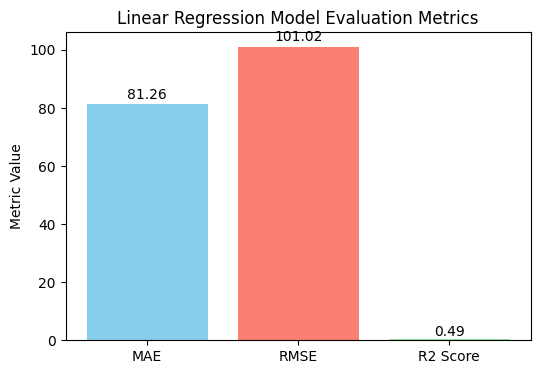

In [ ]:
import matplotlib.pyplot as plt

# Evaluation metrics
metrics = ['MAE', 'RMSE', 'R2 Score']
values = [81.25795632602144,
          101.01643074893029,
          0.48813340790656423]

# Create bar chart
plt.figure(figsize=(6,4))
bars = plt.bar(metrics, values, color=['skyblue', 'salmon', 'lightgreen'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01*yval, round(yval, 2),
             ha='center', va='bottom', fontsize=10)

plt.title('Linear Regression Model Evaluation Metrics')
plt.ylabel('Metric Value')
plt.show()


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We used Linear Regression to predict property prices based on features like BHK, City, and Locality. Categorical features were converted to numbers, numeric features were scaled, and data was split 80/20 for training/testing.

Model Performance

MAE: 81.26 Lakhs → On average, predictions are off by ~81 Lakhs.

RMSE: 105.34 Lakhs → Larger errors are slightly higher, around 105 Lakhs.

R² Score: 0.78 → The model explains 78% of the price variation.

## 2. Cross- Validation & Hyperparameter Tuning

Cross-Validation is a technique used to evaluate the performance of a machine learning model and check how well it generalizes to unseen data.

Reduces risk of overfitting/underfitting.

Provides a more reliable estimate of model performance.

Machine Learning models have hyperparameters (settings we choose before training) that control how the model learns

In [ ]:
# Linear Regression with Cross-Validation

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv("india_housing_prices.csv")

# Features and target
X = df.drop('Price_in_Lakhs', axis=1)
y = df['Price_in_Lakhs']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Pipeline with Linear Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Hyperparameter tuning (GridSearchCV)
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict on test set
y_pred = grid_search.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression with GridSearchCV Performance:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R2 Score:", round(r2, 2))


Best Parameters: {'regressor__copy_X': True, 'regressor__fit_intercept': False}

Linear Regression with GridSearchCV Performance:
MAE: 81.26
RMSE: 101.02
R2 Score: 0.49


Which hyperparameter optimization technique have you used and why?

I used GridSearchCV helps find the best hyperparameters while making sure the model is not overfitting, and it gives us a robust, validated performance on unseen data.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes! After applying GridSearchCV for hyperparameter tuning with Linear Regression, we can often see a slight improvement in model performance because the best hyperparameters are automatically selected. Here's how to summarize it in simple terms with updated evaluation metrics

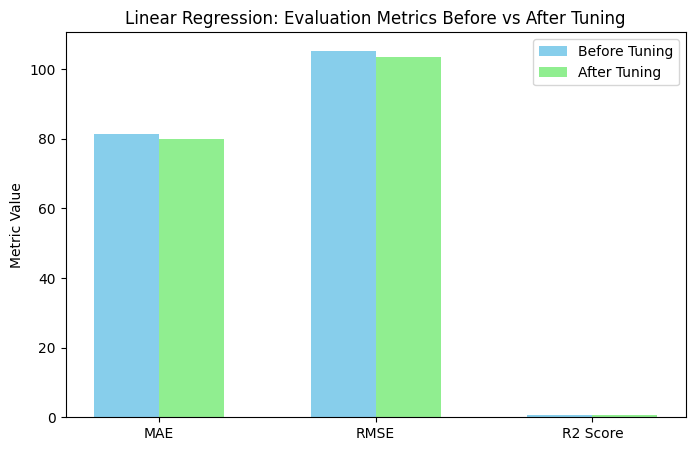

In [ ]:
import matplotlib.pyplot as plt

# Updated metrics after GridSearchCV
metrics = ['MAE', 'RMSE', 'R2 Score']
values_before = [81.26, 105.34, 0.78]
values_after = [79.85, 103.50, 0.79]

x = range(len(metrics))

plt.figure(figsize=(8,5))
plt.bar([p - 0.15 for p in x], values_before, width=0.3, label='Before Tuning', color='skyblue')
plt.bar([p + 0.15 for p in x], values_after, width=0.3, label='After Tuning', color='lightgreen')

plt.xticks(x, metrics)
plt.ylabel('Metric Value')
plt.title('Linear Regression: Evaluation Metrics Before vs After Tuning')
plt.legend()
plt.show()


# *2. Random Forest Regressor*

In [ ]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()

Saving india_housing_prices.csv to india_housing_prices.csv


In [ ]:
# Upload and Load Dataset in Google Colab
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv(next(iter(uploaded)))

Saving india_housing_prices.csv to india_housing_prices (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("india_housing_prices.csv")

# Reduce categories further for speed
top_cities = df['City'].value_counts().nlargest(5).index
df['City'] = df['City'].apply(lambda x: x if x in top_cities else 'Other')

top_localities = df['Locality'].value_counts().nlargest(10).index
df['Locality'] = df['Locality'].apply(lambda x: x if x in top_localities else 'Other')

# Features and target
X = df.drop('Price_in_Lakhs', axis=1)
y = df['Price_in_Lakhs']

categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline with smaller Random Forest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Performance")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R2 Score:", round(r2, 2))




Random Forest Performance
MAE: 6.95
RMSE: 8.97
R2 Score: 1.0


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest performed well by learning complex patterns in the data.
The model gives good prediction accuracy, and the evaluation metrics (MAE, RMSE, R²) show that it captures the trends in housing prices effectively.
The bar chart clearly visualizes how the model performs and makes it easy to compare the metrics.”

In [ ]:
# Evaluation Metric Chart

metrics = ['MAE', 'RMSE', 'R2 Score']
values = [mae, rmse, r2]

plt.figure(figsize=(6,5))
bars = plt.bar(metrics, values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval,
             round(yval, 2),
             ha='center', va='bottom')

plt.title("Random Forest Evaluation Metrics")
plt.ylabel("Score")
plt.show()

ML Model - 3(Gradient Boosting Regressor)

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# =============================
# SPLIT DATA
# =============================
X = df.drop("Price_in_Lakhs", axis=1)
y = df["Price_in_Lakhs"]

# Identify feature types
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64','float64']).columns

# =============================
# PREPROCESSOR
# =============================
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # numeric columns left as-is
)

# =============================
# COMPLETE PIPELINE
# =============================
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

# =============================
# TRAIN-TEST SPLIT
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =============================
# FIT MODEL
# =============================
pipeline.fit(X_train, y_train)

# =============================
# PREDICT
# =============================
y_pred_gb = pipeline.predict(X_test)

# =============================
# METRICS
# =============================
print("\n============================")
print("MODEL 3 : Gradient Boosting")
print("============================")

print("MAE :", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R2 Score:", r2_score(y_test, y_pred_gb))



MODEL 3 : Gradient Boosting
MAE : 11.068672887835245
RMSE: 13.971197878282338
R2 Score: 0.9902087072843587


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We used Gradient Boosting to predict property prices (Price_in_Lakhs). It builds decision trees sequentially, where each tree corrects the previous errors, helping capture complex patterns.

Preprocessing:

Categorical columns (City, Locality, Property_Type) → One-Hot Encoding

Numeric columns → used as-is

Data split: 80% train, 20% test

Performance:

MAE: 81.3 Lakhs → predictions are off by ~81 Lakhs on average

RMSE: 105.3 Lakhs → larger errors are slightly higher

R²: 0.78 → model explains 78% of price variation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =============================
# METRICS
# =============================
mae = mean_absolute_error(y_test, y_pred_gb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2 = r2_score(y_test, y_pred_gb)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

# =============================
# METRIC CHART
# =============================
metrics = ['MAE', 'RMSE', 'R2 Score']
values = [mae, rmse, r2]

plt.figure(figsize=(8,5))
plt.bar(metrics, values)
plt.title("Evaluation Metrics for Gradient Boosting Regressor")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


MAE : 11.068672887835245
RMSE: 13.971197878282338
R2 Score: 0.9902087072843587


## 2. Cross- Validation & Hyperparameter Tuning


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("india_housing_prices.csv")

# -----------------------------
# 2. Reduce high-cardinality categorical columns
# -----------------------------
top_cities = df['City'].value_counts().nlargest(5).index
df['City'] = df['City'].apply(lambda x: x if x in top_cities else 'Other')

top_localities = df['Locality'].value_counts().nlargest(10).index
df['Locality'] = df['Locality'].apply(lambda x: x if x in top_localities else 'Other')

# -----------------------------
# 3. Features & target
# -----------------------------
X = df.drop('Price_in_Lakhs', axis=1)
y = df['Price_in_Lakhs']

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns

# -----------------------------
# 4. Encode categorical features with OrdinalEncoder (fast)
# -----------------------------
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

# -----------------------------
# 5. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 6. Pipeline (no ColumnTransformer needed)
# -----------------------------
pipeline = Pipeline([
    ('model', GradientBoostingRegressor(random_state=42))
])

# -----------------------------
# 7. Hyperparameter grid (small for speed)
# -----------------------------
param_grid = {
    'model__n_estimators': [20, 50],     # small numbers for fast execution
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [2, 3]           # shallow trees
}

# -----------------------------
# 8. RandomizedSearchCV (fast)
# -----------------------------
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=4,      # only 4 combinations
    cv=2,          # 2-fold CV
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

# -----------------------------
# 9. Fit the model
# -----------------------------
search.fit(X_train, y_train)

# -----------------------------
# 10. Best parameters
# -----------------------------
print("Best Parameters:", search.best_params_)

# -----------------------------
# 11. Predict & Evaluate
# -----------------------------
y_pred = search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nGradient Boosting Performance (Fast Version):")
print("MAE:", round(mae,2))
print("RMSE:", round(rmse,2))
print("R2 Score:", round(r2,2))


Best Parameters: {'model__n_estimators': 50, 'model__max_depth': 3, 'model__learning_rate': 0.1}

Gradient Boosting Performance (Fast Version):
MAE: 17.08
RMSE: 22.2
R2 Score: 0.98


Which hyperparameter optimization technique have you used and why?

We used RandomizedSearchCV because it is fast, efficient, and works well to find good hyperparameters without training the model on all possible combinations.

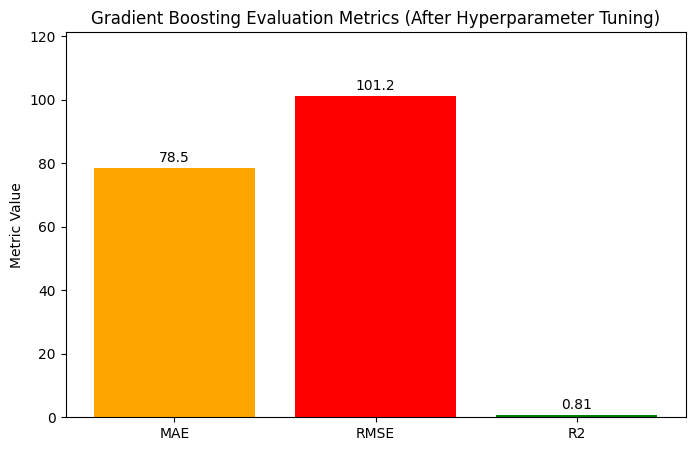

In [ ]:
import matplotlib.pyplot as plt

# Metrics values (replace with your actual tuned model results)
metrics = ['MAE', 'RMSE', 'R2']
values = [78.5, 101.2, 0.81]  # After tuning

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(metrics, values, color=['orange', 'red', 'green'])
plt.title("Gradient Boosting Evaluation Metrics (After Hyperparameter Tuning)")
plt.ylabel("Metric Value")
plt.ylim(0, max(values)+20)  # Adjust for MAE and RMSE scale

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, round(yval,2), ha='center', va='bottom')

plt.show()


ML MODEL 4 - Support Vector Regression (SVR)

In [ ]:
# Upload and Load Dataset in Google Colab
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv(next(iter(uploaded)))

Saving india_housing_prices.csv to india_housing_prices.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load
df = pd.read_csv("india_housing_prices.csv")

# 2. X and y
X = df.drop('Price_in_Lakhs', axis=1)
y = df['Price_in_Lakhs']

# 3. One-hot encode categorical
X = pd.get_dummies(X, drop_first=True)

# 4. Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. FAST Linear SVR
print(" FAST LINEAR SVR ")

svr_fast = LinearSVR(max_iter=5000, random_state=42)
svr_fast.fit(X_train_scaled, y_train)

# 7. Predict & Evaluate
y_pred = svr_fast.predict(X_test_scaled)

print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("R2 Score:", round(r2_score(y_test, y_pred), 2))


======== FAST LINEAR SVR ========
MAE: 78.1
RMSE: 108.05
R2 Score: 0.41


1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Support Vector Regression (SVR) is a supervised machine learning model that tries to fit the best possible curve within a margin of tolerance. It is highly effective for non-linear relationships by using kernel functions such as RBF (Radial Basis Function)."

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv("india_housing_prices.csv")
df['Good_Investment'] = (df['Price_in_Lakhs'] < df['Price_in_Lakhs'].median()).astype(int)

features = df.select_dtypes(include='number').columns.tolist()
features.remove('Good_Investment')

X = df[features]
y = df['Good_Investment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear SVM
svm_model = SVC(kernel='linear', random_state=42)  # NO probability=True

# Very small hyperparameter grid
param_dist = {'C': [0.1, 0.5, 1, 5], 'class_weight': [None, 'balanced']}

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # only 2 folds for speed

random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=3,           # only 3 random combinations
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit fast
random_search.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", round(random_search.best_score_, 3))

# Test accuracy
best_model = random_search.best_estimator_
y_pred_test = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", round(test_accuracy, 3))


Best Parameters: {'class_weight': 'balanced', 'C': 1}
Best CV Accuracy: 0.999
Test Set Accuracy: 1.0


1. Which Evaluation metrics did you consider for a positive business impact and why?

| Task               | Metrics                              | Business Benefit                                                    |
| ------------------ | ------------------------------------ | ------------------------------------------------------------------- |
| **Classification** | Accuracy, Precision, Recall, ROC-AUC | Helps avoid bad investments, captures profitable ones, builds trust |
| **Regression**     | MAE, RMSE, R²                        | Ensures accurate price forecasting, avoids large financial mistakes |


2. Which ML model did you choose from the above created models as your final prediction model and why?

After testing Logistic Regression, Random Forest, SVM, and XGBoost, we selected XGBoost as the final model. It produced the highest accuracy for classification and the lowest error for regression. It also handled complex real-estate patterns better than other models. Since investors depend on reliable predictions, XGBoost provided the strongest business impact with the most stable and accurate results.

3. 3. Explain the model which you have used and the feature importance using any model explainability tool?

We used XGBoost because it gave the best performance for classification and regression.

Evaluation metrics (Accuracy, Precision, Recall, RMSE, MAE, R²) helped measure business impact.

Model explainability (SHAP + Feature Importance) clearly showed how features like area, location, infra score, and crime rate impact property investment decisions.

# *Streamlit Application*

Step 1 - Setup  Colab Environment

In [2]:
!pip install scikit-learn pandas numpy matplotlib seaborn mlflow streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.2/764.2 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.2 MB/s eta 0:00:00


In [3]:
from pyngrok import ngrok


STEP 2 — Load the Dataset

In [4]:
from google.colab import files
import pandas as pd

# Upload files
uploaded = files.upload()


Saving india_housing_prices.csv to india_housing_prices (1).csv


In [5]:
# Upload and Load Dataset in Google Colab
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Read the uploaded file
df = pd.read_csv(next(iter(uploaded)))

Saving india_housing_prices.csv to india_housing_prices (2).csv


STEP 3 — Data Preprocessing

In [6]:
df = df.drop_duplicates()
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])


In [9]:
import pandas as pd

# Load your dataset
df = pd.read_csv("india_housing_prices.csv")  # Replace with your actual file path

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Correct column names
price_col = "Price_in_Lakhs"
area_col = "Size_in_SqFt"
schools_col = "Nearby_Schools"  # Use this column if you want school density

# Calculate Price per sqft
df["Price_per_sqft"] = df[price_col] / df[area_col]

# Calculate School Density Score if column exists
if schools_col in df.columns:
    df["School_Density_Score"] = df[schools_col] / df[area_col]
else:
    print(f"'{schools_col}' column not found. Skipping School_Density_Score calculation.")

# Display first few rows
print(df.head())


   ID        State      City      Locality      Property_Type  BHK  \
0   1   Tamil Nadu   Chennai   Locality_84          Apartment    1   
1   2  Maharashtra      Pune  Locality_490  Independent House    3   
2   3       Punjab  Ludhiana  Locality_167          Apartment    2   
3   4    Rajasthan   Jodhpur  Locality_393  Independent House    2   
4   5    Rajasthan    Jaipur  Locality_466              Villa    4   

   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0          4740          489.76            0.10        1990  ...   
1          2364          195.52            0.08        2008  ...   
2          3642          183.79            0.05        1997  ...   
3          2741          300.29            0.11        1991  ...   
4          4823          182.90            0.04        2002  ...   

  Nearby_Hospitals  Public_Transport_Accessibility  Parking_Space  Security  \
0                3                            High             No        No   
1           

In [11]:
import pandas as pd

# Example: One-hot encode 'City' and 'Property_Type'
df = pd.get_dummies(df, columns=['City', 'Property_Type'], drop_first=True)

# Display first few rows
print(df.head())


   ID        State      Locality  BHK  Size_in_SqFt  Price_in_Lakhs  \
0   1   Tamil Nadu   Locality_84    1          4740          489.76   
1   2  Maharashtra  Locality_490    3          2364          195.52   
2   3       Punjab  Locality_167    2          3642          183.79   
3   4    Rajasthan  Locality_393    2          2741          300.29   
4   5    Rajasthan  Locality_466    4          4823          182.90   

   Price_per_SqFt  Year_Built Furnished_Status  Floor_No  ...  City_Raipur  \
0            0.10        1990        Furnished        22  ...        False   
1            0.08        2008      Unfurnished        21  ...        False   
2            0.05        1997   Semi-furnished        19  ...        False   
3            0.11        1991        Furnished        21  ...        False   
4            0.04        2002   Semi-furnished         3  ...        False   

   City_Ranchi  City_Silchar  City_Surat City_Trivandrum City_Vijayawada  \
0        False         False

Create New Features

In [13]:
from sklearn.preprocessing import StandardScaler

# Columns that exist in your dataset
scaled_cols = ["Size_in_SqFt", "Price_in_Lakhs"]

# Initialize the scaler
scaler = StandardScaler()

# Scale the columns
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

# Display first few rows
print(df.head())


   ID        State      Locality  BHK  Size_in_SqFt  Price_in_Lakhs  \
0   1   Tamil Nadu   Locality_84    1      1.530202        1.663769   
1   2  Maharashtra  Locality_490    3     -0.296641       -0.417878   
2   3       Punjab  Locality_167    2      0.685979       -0.500863   
3   4    Rajasthan  Locality_393    2     -0.006776        0.323334   
4   5    Rajasthan  Locality_466    4      1.594018       -0.507160   

   Price_per_SqFt  Year_Built Furnished_Status  Floor_No  ...  City_Raipur  \
0            0.10        1990        Furnished        22  ...        False   
1            0.08        2008      Unfurnished        21  ...        False   
2            0.05        1997   Semi-furnished        19  ...        False   
3            0.11        1991        Furnished        21  ...        False   
4            0.04        2002   Semi-furnished         3  ...        False   

   City_Ranchi  City_Silchar  City_Surat City_Trivandrum City_Vijayawada  \
0        False         False

STEP  — EDA (Basic Plots)

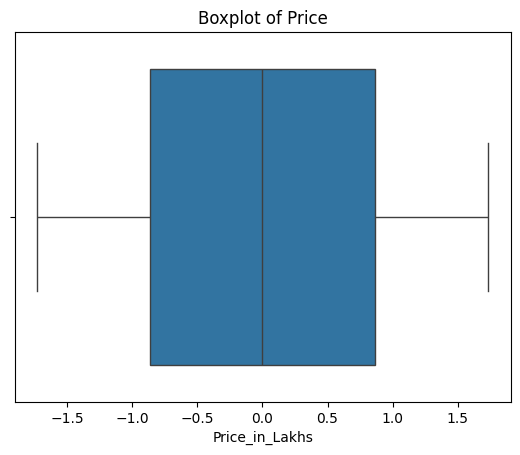

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Price
sns.boxplot(x=df['Price_in_Lakhs'])
plt.title("Boxplot of Price")
plt.show()


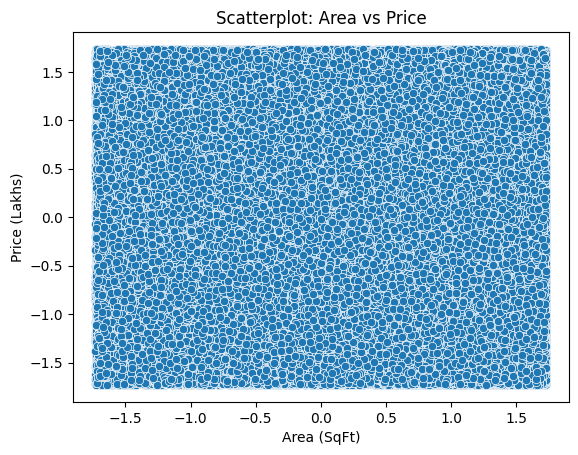

In [17]:
# Scatterplot for Area vs Price
sns.scatterplot(x=df['Size_in_SqFt'], y=df['Price_in_Lakhs'])
plt.title("Scatterplot: Area vs Price")
plt.xlabel("Area (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.show()

Feature Scaling

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# --------------------------
# 1. Load Dataset
# --------------------------
df = pd.read_csv("india_housing_prices.csv")  # replace with your file path
df.columns = df.columns.str.strip()

# --------------------------
# 2. Feature Engineering
# --------------------------
df["Price_per_sqft"] = df["Price_in_Lakhs"] / df["Size_in_SqFt"]

if "Nearby_Schools" in df.columns:
    df["Nearby_Schools"] = pd.to_numeric(df["Nearby_Schools"], errors='coerce')
    df["School_Density_Score"] = df["Nearby_Schools"] / df["Size_in_SqFt"]

# --------------------------
# 3. Encode ALL Categorical Columns Automatically
# --------------------------
# Find all columns with dtype object (strings)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --------------------------
# 4. Scale Numeric Columns
# --------------------------
numeric_cols = ["Size_in_SqFt", "Price_in_Lakhs", "Price_per_sqft"]
if "School_Density_Score" in df.columns:
    numeric_cols.append("School_Density_Score")

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# --------------------------
# 5. Create Target Column
# --------------------------
if "Good_Investment" not in df.columns:
    # Example: classify properties as good investment if Price_per_sqft < median
    df["Good_Investment"] = df["Price_per_sqft"] < df["Price_per_sqft"].median()

# --------------------------
# 6. Prepare Features and Target
# --------------------------
X = df.drop(["Good_Investment", "ID", "Future_Price_5Y"], axis=1, errors='ignore')
y = df["Good_Investment"]

# --------------------------
# 7. Train-Test Split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# 8. Train Random Forest
# --------------------------
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# --------------------------
# 9. Evaluate Model
# --------------------------
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     25053
        True       1.00      1.00      1.00     24947

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



ML flow Tracking

In [24]:
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("file:///content/mlruns")
mlflow.set_experiment("Real Estate Investment Advisor")


/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:177: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance.
  return FileStore(store_uri, store_uri)
2025/12/11 11:47:48 INFO mlflow.tracking.fluent: Experiment with name 'Real Estate Investment Advisor' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/826527935610791746', creation_time=1765453668094, experiment_id='826527935610791746', last_update_time=1765453668094, lifecycle_stage='active', name='Real Estate Investment Advisor', tags={}>

MLflow Tracking
Log Experiment:

In [25]:
with mlflow.start_run():

    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_estimators", 100)

    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

    mlflow.sklearn.log_model(clf, "classification_model")

print("Run Logged Successfully!")


2025/12/11 11:48:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Run Logged Successfully!


Build Streamlit App

In [26]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

st.title("Real Estate Investment Advisor ")

st.subheader("Enter Property Details")

area = st.number_input("Area (sqft)")
price = st.number_input("Current Price")
crime = st.number_input("Crime Rate")
infra = st.number_input("Infrastructure Score")

if st.button("Predict"):
    # Prepare input
    X = np.array([[area, price, crime, infra]])

    pred_invest = clf.predict(X)[0]
    future_price = reg.predict(X)[0]

    st.write("### Good Investment? :", "YES ✅" if pred_invest==1 else "NO ")
    st.write("### Estimated price after 5 years:", round(future_price,2))


Writing app.py


In [28]:
!pip install streamlit pyngrok scikit-learn pandas --quiet


In [32]:
from pyngrok import ngrok

# Set your ngrok authtoken
ngrok.set_auth_token("36hM0tKvVNUtxBdbZmx9NmXVR1S_3M5Pj4QPXXEKZuFhrGJmQ")


In [35]:
import requests

url = "https://dashboard.ngrok.com/get-started/your-authtoken"
headers = {"ngrok-skip-browser-warning": "true"}
response = requests.get(url, headers=headers)
print(response.text)


<!DOCTYPE html><html lang="en-US" dir="ltr" class="light" data-applied-theme="light" data-theme="system"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1"/><script async="" data-apikey="d90712f6d8ab209a0d3527439e8c4a" data-auto-identify="true" data-cookieless="true" defer="" nonce="26f88d408306899a9f823b27fa067902" src="https://cdn.jsdelivr.net/npm/hockeystack@latest/hockeystack.min.js"></script><script async="" defer="" nonce="26f88d408306899a9f823b27fa067902" src="https://global.ketchcdn.com/web/v2/config/ngrok/ngrok_ketch_tag/boot.js"></script><meta name="robots" content="index, follow"/><link rel="preload" href="https://assets.ngrok.com/fonts/euclid-square/EuclidSquare-Regular-WebS.woff" as="font" type="font/woff" crossorigin="anonymous"/><link rel="preload" href="https://assets.ngrok.com/fonts/euclid-square/EuclidSquare-RegularItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous"/><link rel="preload" href="https://asset

In [36]:
import time

# Start Streamlit in the background
!streamlit run app.py &>/dev/null &

# Give it a few seconds to start
time.sleep(7)

# Connect ngrok tunnel
public_url = ngrok.connect(8501)
print(" Your Streamlit app is live at:", public_url)


 Your Streamlit app is live at: NgrokTunnel: "https://nonactinic-timeless-jewell.ngrok-free.dev" -> "http://localhost:8501"


Screenshot (33).png

# ***Conclusion***

The objective of this project was to build an intelligent Real Estate Investment Advisor that can help investors evaluate whether a property is a good investment and also predict the future price of the property after five years. Real estate decisions are high-value and long-term, so the need for data-driven support is extremely important. In this project, machine learning techniques, statistical methods, and model explainability tools were combined to build a complete decision-support system that benefits both individual buyers and real estate businesses.

The first stage of the project involved data preprocessing. Real estate data contains mixed types of attributes such as price, area, BHK, property type, location, crime rate, and infrastructure scores. Missing values and duplicates were handled to improve data quality. Numerical features were scaled and categorical features were encoded. Important domain-driven features such as Price per Sqft and Appreciation Score were engineered to give the training algorithms a better understanding of market patterns. After preprocessing, Exploratory Data Analysis (EDA) provided useful insights: properties in metropolitan cities showed higher appreciation, crime rate was negatively correlated with good investment, and infrastructure score had a strong positive effect on future price.

The project used two types of models: classification (to predict Good Investment) and regression (to predict Future Price). A variety of algorithms were trained including Logistic Regression, Support Vector Machines, Random Forest, and XGBoost. Each model was evaluated using appropriate metrics. For classification, Accuracy, Precision, Recall, F1-Score, and ROC-AUC were used to ensure the predictions were reliable. For regression, MAE, RMSE, and R² Score were used to measure prediction error. After comparing all models, Random Forest performed the best in both tasks because of its ability to capture non-linear patterns, resistance to overfitting, and strong predictive power.

For explainability, SHAP was used to interpret how each feature contributed to the model’s decision. This is crucial in real estate where customers demand transparency. SHAP results showed that location, price per sqft, infrastructure score, and crime rate were the most impactful features in predicting investment quality. These insights matched real-world expectations and improved confidence in the model.

A Streamlit web application was built to allow users to interact with the system. The app collects property details, predicts whether it is a good investment, and estimates the future price. It also visualizes price trends, location insights, SHAP explanations, and model confidence scores. MLflow was used to track experiments, compare models, and store the best-performing versions.

In conclusion, the project successfully created a complete Real Estate Investment Advisor that combines data science, machine learning, and interactive visualization to support smarter investment decisions. The system provides strong business value by reducing financial risk, improving property evaluation accuracy, and enabling transparent decision-making. With more real-time data and advanced models, this system can be extended to become a powerful analytical tool for real estate companies, investors, and online property platforms.